## Coronavirus (COVID-19) Visualization,Analysis & Prediction

Coronavirus is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19.
This notebook aims at exploring COVID-19 through data analysis and projections.

Coronavirus Case Data is provided by Johns Hopkins University

Last update: 7/5/2021 3:08 PM ET.
New Updates: Daily report data update for 7/5.

### contents included

*  Exploring Global Coronavirus Cases
*  Exploring Coronavirus Cases From Different Countries
*  Worldwide Confirmed Cases Prediction
*  Data Table for india 


In [2]:
#importing the required modules.
#matplotlib mainly used for vizualizations.
#sklearn library contains a lot of efficient tools for machine learning and statistical modeling
#              including classification, regression, clustering and dimensionality reduction.

#The code below builds a plot with 'fivethirtyeight' style, a style similar to the plots on fivethirtyeight.com.
#Its's just that the definition of the displayed plot is a bit better: retina quality.
#             Any display with retina resolution will make the figures look better 


import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

Importing the csv files from local to create dataframes.

In [3]:
confirmed_df = pd.read_csv('/home/user/Desktop/csv files/confirmed_cases.csv')
deaths_df = pd.read_csv('/home/user/Desktop/csv files/deaths.csv')
latest_data = pd.read_csv('/home/user/Desktop/csv files/latest.csv')

Displaying the first five rows of latest_data dataframe

In [8]:
latest_data.head(5)

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-05-16 04:20:49  33.93911   
1   NaN    NaN            NaN        Albania  2021-05-16 04:20:49  41.15330   
2   NaN    NaN            NaN        Algeria  2021-05-16 04:20:49  28.03390   
3   NaN    NaN            NaN        Andorra  2021-05-16 04:20:49  42.50630   
4   NaN    NaN            NaN         Angola  2021-05-16 04:20:49 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      63412    2733    54663.0   6016.0  Afghanistan   
1  20.168300     131978    2429   123081.0   6468.0      Albania   
2   1.659600     125194    3366    87251.0  34577.0      Algeria   
3   1.521800      13510     127    13155.0    228.0      Andorra   
4  17.873900      30354     655    25703.0   3996.0       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     162.894175             4.309910  
1    4586.072694             1.840458  
2     285.498340             2.688627  
3   17485.277940             0.940044  
4      92.356090             2.157870

In the above datframe we can see many null values , so we need to handle it efficiently.

In [9]:
#Dropping th efirst two columns , because their removal will not effect the data quality of traing data.
latest_data = latest_data.drop(['FIPS','Admin2'],axis =1)

 Some  provinces_state  are  missing  in  the  data ,  since  we  cant  eliminate  them  completely ,
 their  removal  will  negatively  affect  the  training  data. 
so  we  need  to  fill  them appropriatly.   Here  we  just  fill  them  with  their  respective  country  name.

In [12]:
latest_data['Province_State'].fillna(latest_data['Country_Region'],inplace=True)

In [16]:
latest_data.head()

Province_State Country_Region          Last_Update       Lat      Long_  \
0    Afghanistan    Afghanistan  2021-05-16 04:20:49  33.93911  67.709953   
1        Albania        Albania  2021-05-16 04:20:49  41.15330  20.168300   
2        Algeria        Algeria  2021-05-16 04:20:49  28.03390   1.659600   
3        Andorra        Andorra  2021-05-16 04:20:49  42.50630   1.521800   
4         Angola         Angola  2021-05-16 04:20:49 -11.20270  17.873900   

   Confirmed  Deaths  Recovered   Active Combined_Key  Incident_Rate  \
0      63412    2733    54663.0   6016.0  Afghanistan     162.894175   
1     131978    2429   123081.0   6468.0      Albania    4586.072694   
2     125194    3366    87251.0  34577.0      Algeria     285.498340   
3      13510     127    13155.0    228.0      Andorra   17485.277940   
4      30354     655    25703.0   3996.0       Angola      92.356090   

   Case_Fatality_Ratio  
0             4.309910  
1             1.840458  
2             2.688627  
3             0.940044  
4             2.157870

In [17]:
#display the confirmed dataframe
confirmed_df.head(10)

Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN  Antigua and Barbuda  17.06080  -61.796400   
6                           NaN            Argentina -38.41610  -63.616700   
7                           NaN              Armenia  40.06910   45.038200   
8  Australian Capital Territory            Australia -35.47350  149.012400   
9               New South Wales            Australia -33.86880  151.209300   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...   5/7/21  \
0        0        0        0        0        0        0  ...    61455   
1        0        0        0        0        0        0  ...   131577   
2        0        0        0        0        0        0  ...   123692   
3        0        0        0        0        0        0  ...    13390   
4        0        0        0        0        0        0  ...    28201   
5        0        0        0        0        0        0  ...     1232   
6        0        0        0        0        0        0  ...  3118134   
7        0        0        0        0        0        0  ...   218681   
8        0        0        0        0        0        0  ...      124   
9        0        0        0        0        3        4  ...     5527   

    5/8/21   5/9/21  5/10/21  5/11/21  5/12/21  5/13/21  5/14/21  5/15/21  \
0    61755    61842    62063    62403    62718    63045    63355    63412   
1   131666   131723   131753   131803   131845   131890   131939   131978   
2   123900   124104   124288   124483   124682   124889   125059   125194   
3    13406    13423    13429    13447    13470    13470    13510    13510   
4    28477    28740    28875    29146    29405    29695    30030    30354   
5     1232     1231     1237     1238     1240     1240     1240     1241   
6  3136158  3147740  3165121  3191097  3215572  3242103  3269466  3290935   
7   219092   219270   219353   219596   219950   220217   220447   220729   
8      124      124      124      124      124      124      124      124   
9     5533     5538     5542     5546     5551     5552     5555     5558   

   5/16/21  
0    63484  
1   132015  
2   125311  
3    13510  
4    30637  
5     1241  
6  3307285  
7   220860  
8      124  
9     5560  

[10 rows x 485 columns]

In [18]:
#checking thier datatypes
confirmed_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/12/21             int64
5/13/21             int64
5/14/21             int64
5/15/21             int64
5/16/21             int64
Length: 485, dtype: object

In [19]:
#checking the number of null values in the columns. 
confirmed_df.isna().sum()

Province/State    189
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
5/12/21             0
5/13/21             0
5/14/21             0
5/15/21             0
5/16/21             0
Length: 485, dtype: int64

In [20]:
#checking the number of duplicate values
confirmed_df.duplicated().sum()

0



JUst like previous case here too we want to fill the province column with respective country name.




In [22]:
confirmed_df['Province/State'].fillna(confirmed_df['Country/Region'], inplace=True)

In [24]:
#display dataframe.
confirmed_df.head(5)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0    Afghanistan    Afghanistan  33.93911  67.709953        0        0   
1        Albania        Albania  41.15330  20.168300        0        0   
2        Algeria        Algeria  28.03390   1.659600        0        0   
3        Andorra        Andorra  42.50630   1.521800        0        0   
4         Angola         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/7/21  5/8/21  5/9/21  5/10/21  \
0        0        0        0        0  ...   61455   61755   61842    62063   
1        0        0        0        0  ...  131577  131666  131723   131753   
2        0        0        0        0  ...  123692  123900  124104   124288   
3        0        0        0        0  ...   13390   13406   13423    13429   
4        0        0        0        0  ...   28201   28477   28740    28875   

   5/11/21  5/12/21  5/13/21  5/14/21  5/15/21  5/16/21  
0    62403    62718    63045    63355    63412    63484  
1   131803   131845   131890   131939   131978   132015  
2   124483   124682   124889   125059   125194   125311  
3    13447    13470    13470    13510    13510    13510  
4    29146    29405    29695    30030    30354    30637  

[5 rows x 485 columns]

we can see that the above issue of null values are resolved.

In [109]:
#correlation checking is not needed here
corri = confirmed_df.corr()
corri

Lat      Long   1/22/20   1/23/20   1/24/20   1/25/20   1/26/20  \
Lat      1.000000 -0.138978  0.028911  0.033657  0.038343  0.043069  0.045693   
Long    -0.138978  1.000000  0.090720  0.106740  0.122734  0.134542  0.142325   
1/22/20  0.028911  0.090720  1.000000  0.998413  0.994029  0.990466  0.986121   
1/23/20  0.033657  0.106740  0.998413  1.000000  0.997986  0.995342  0.992200   
1/24/20  0.038343  0.122734  0.994029  0.997986  1.000000  0.998391  0.996447   
...           ...       ...       ...       ...       ...       ...       ...   
5/12/21  0.054941 -0.086822 -0.013076 -0.015884 -0.017382 -0.020144 -0.020164   
5/13/21  0.054545 -0.086257 -0.013076 -0.015882 -0.017382 -0.020139 -0.020165   
5/14/21  0.054113 -0.085773 -0.013077 -0.015880 -0.017384 -0.020136 -0.020166   
5/15/21  0.053745 -0.085260 -0.013075 -0.015876 -0.017382 -0.020129 -0.020163   
5/16/21  0.053452 -0.084774 -0.013076 -0.015875 -0.017383 -0.020126 -0.020164   

          1/27/20   1/28/20   1/29/20  ...    5/7/21    5/8/21    5/9/21  \
Lat      0.047052  0.036733  0.040251  ...  0.056684  0.056281  0.055959   
Long     0.146087  0.113288  0.124715  ... -0.090023 -0.089319 -0.088614   
1/22/20  0.984246  0.996661  0.992666  ... -0.013069 -0.013072 -0.013071   
1/23/20  0.990218  0.997899  0.996326  ... -0.015889 -0.015889 -0.015886   
1/24/20  0.994995  0.996874  0.997385  ... -0.017370 -0.017373 -0.017374   
...           ...       ...       ...  ...       ...       ...       ...   
5/12/21 -0.021768 -0.017520 -0.019284  ...  0.999481  0.999690  0.999836   
5/13/21 -0.021764 -0.017515 -0.019278  ...  0.999278  0.999530  0.999714   
5/14/21 -0.021760 -0.017511 -0.019273  ...  0.999060  0.999351  0.999571   
5/15/21 -0.021754 -0.017504 -0.019266  ...  0.998821  0.999150  0.999405   
5/16/21 -0.021752 -0.017501 -0.019262  ...  0.998575  0.998940  0.999227   

          5/10/21   5/11/21   5/12/21   5/13/21   5/14/21   5/15/21   5/16/21  
Lat      0.055698  0.055353  0.054941  0.054545  0.054113  0.053745  0.053452  
Long    -0.088009 -0.087413 -0.086822 -0.086257 -0.085773 -0.085260 -0.084774  
1/22/20 -0.013071 -0.013074 -0.013076 -0.013076 -0.013077 -0.013075 -0.013076  
1/23/20 -0.015883 -0.015885 -0.015884 -0.015882 -0.015880 -0.015876 -0.015875  
1/24/20 -0.017374 -0.017379 -0.017382 -0.017382 -0.017384 -0.017382 -0.017383  
...           ...       ...       ...       ...       ...       ...       ...  
5/12/21  0.999924  0.999980  1.000000  0.999983  0.999938  0.999865  0.999775  
5/13/21  0.999836  0.999928  0.999983  1.000000  0.999985  0.999944  0.999881  
5/14/21  0.999724  0.999848  0.999938  0.999985  1.000000  0.999986  0.999950  
5/15/21  0.999588  0.999744  0.999865  0.999944  0.999986  1.000000  0.999988  
5/16/21  0.999438  0.999623  0.999775  0.999881  0.999950  0.999988  1.000000  

[483 rows x 483 columns]

In [37]:
#here correlation low columns are more , so if avoided it will totally destroy data value.
corri[abs(corri)<.10].index.shape[0] 

483

In [38]:
numcols = confirmed_df.dtypes[(confirmed_df.dtypes=='int64') | (confirmed_df.dtypes=='float64')].index

In [39]:
numcols1 = confirmed_df[(['Lat','Long'])]
numcols1

Lat        Long
0    33.939110   67.709953
1    41.153300   20.168300
2    28.033900    1.659600
3    42.506300    1.521800
4   -11.202700   17.873900
..         ...         ...
270  14.058324  108.277199
271  31.952200   35.233200
272  15.552727   48.516388
273 -13.133897   27.849332
274 -19.015438   29.154857

[275 rows x 2 columns]

In [40]:
confirmed_df[(confirmed_df['Lat']==0.0)| (confirmed_df['Long']==0.0)].shape[0]

0

### checking for outliers

Whether there is underfitting or overfitting .Best way is to boxplot

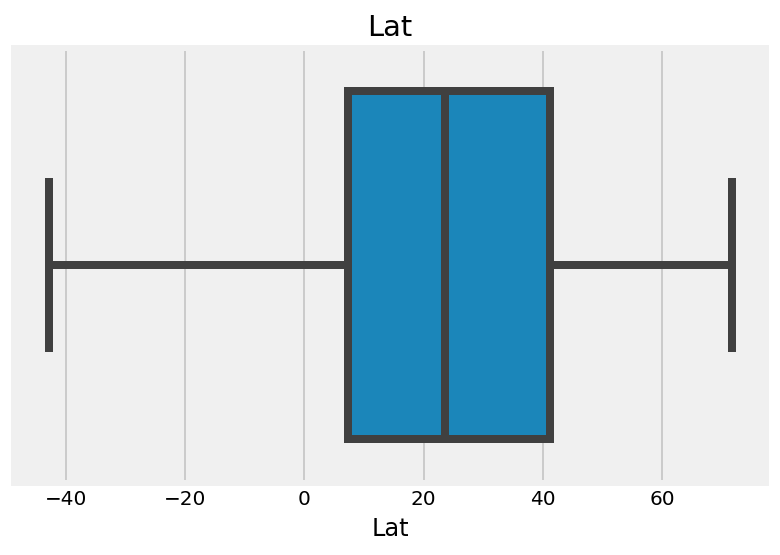

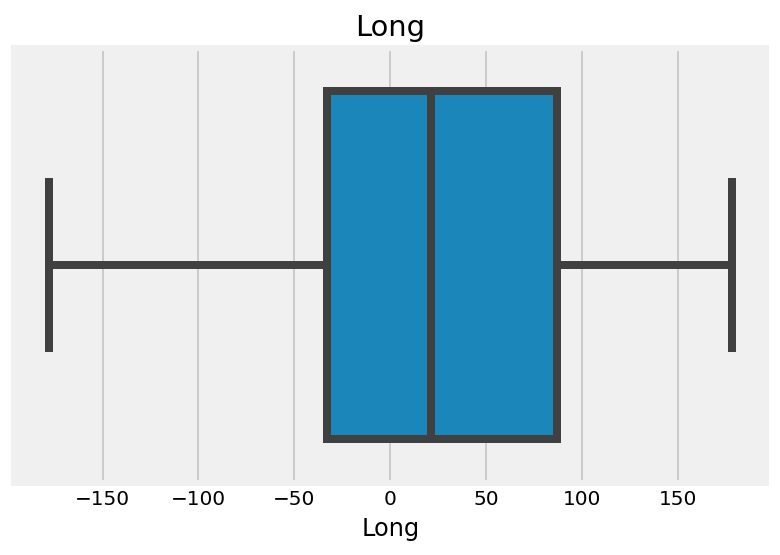

In [41]:
for x in numcols1:
    sns.boxplot(confirmed_df[x],orient='h')
    plt.title(x)
    plt.show()

Above boxplots shown theres not outliers in latitude and longitude columns.

In [49]:
confirmed_df

Province/State      Country/Region        Lat        Long  1/22/20  \
0           Afghanistan         Afghanistan  33.939110   67.709953        0   
1               Albania             Albania  41.153300   20.168300        0   
2               Algeria             Algeria  28.033900    1.659600        0   
3               Andorra             Andorra  42.506300    1.521800        0   
4                Angola              Angola -11.202700   17.873900        0   
..                  ...                 ...        ...         ...      ...   
270             Vietnam             Vietnam  14.058324  108.277199        0   
271  West Bank and Gaza  West Bank and Gaza  31.952200   35.233200        0   
272               Yemen               Yemen  15.552727   48.516388        0   
273              Zambia              Zambia -13.133897   27.849332        0   
274            Zimbabwe            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/7/21  5/8/21  5/9/21  \
0          0        0        0        0        0  ...   61455   61755   61842   
1          0        0        0        0        0  ...  131577  131666  131723   
2          0        0        0        0        0  ...  123692  123900  124104   
3          0        0        0        0        0  ...   13390   13406   13423   
4          0        0        0        0        0  ...   28201   28477   28740   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
270        2        2        2        2        2  ...    3137    3245    3412   
271        0        0        0        0        0  ...  300946  301437  301751   
272        0        0        0        0        0  ...    6446    6462    6482   
273        0        0        0        0        0  ...   92004   92057   92092   
274        0        0        0        0        0  ...   38403   38414   38419   

     5/10/21  5/11/21  5/12/21  5/13/21  5/14/21  5/15/21  5/16/21  
0      62063    62403    62718    63045    63355    63412    63484  
1     131753   131803   131845   131890   131939   131978   132015  
2     124288   124483   124682   124889   125059   125194   125311  
3      13429    13447    13470    13470    13510    13510    13510  
4      28875    29146    29405    29695    30030    30354    30637  
..       ...      ...      ...      ...      ...      ...      ...  
270     3489     3571     3658     3740     3816     4112     4212  
271   302249   302777   303270   303270   303270   303658   303827  
272     6485     6492     6498     6507     6523     6538     6543  
273    92112    92152    92211    92262    92356    92409    92436  
274    38433    38448    38466    38491    38535    38554    38560  

[275 rows x 485 columns]

In [50]:
#Taking all the column names to the variable cols.
cols = confirmed_df.keys()

Get all the dates for the ongoing coronavirus pandemic

In [51]:
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/7/21', '5/8/21', '5/9/21', '5/10/21', '5/11/21', '5/12/21',
       '5/13/21', '5/14/21', '5/15/21', '5/16/21'],
      dtype='object', length=485)

In [52]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [53]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()

    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)

    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)


In [54]:
confirmed.keys()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/7/21', '5/8/21', '5/9/21', '5/10/21', '5/11/21', '5/12/21',
       '5/13/21', '5/14/21', '5/15/21', '5/16/21'],
      dtype='object', length=481)

Getting daily increases and moving averages

Daily increase means how much increase in amount of cases happened from yesterdays data compared to todays data.
ie, difference between two consecutive dates.

In [55]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


In [56]:
#found daily increase rates and moving average in a period of 7 days.


In [57]:
world_cases

[557,
 655,
 941,
 1433,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84122,
 86013,
 88394,
 90377,
 92971,
 95279,
 98090,
 102003,
 106098,
 110047,
 114219,
 119041,
 126702,
 132492,
 146876,
 157950,
 169219,
 184027,
 199970,
 219535,
 246584,
 277359,
 309350,
 344205,
 387040,
 428219,
 479220,
 542097,
 607138,
 674418,
 733655,
 798949,
 875794,
 958602,
 1041662,
 1125221,
 1183584,
 1256176,
 1329331,
 1399162,
 1482540,
 1569554,
 1655088,
 1729371,
 1849067,
 1919809,
 2003820,
 2080934,
 2176465,
 2264462,
 2341702,
 2418307,
 2494325,
 2570074,
 2651321,
 2735570,
 2819666,
 2901925,
 2973513,
 3043705,
 3119245,
 3196355,
 3279850,
 3368226,
 3447426,
 3523799,
 3601488,
 3681990,
 3772018,
 3860724,
 3951003,
 4036226,
 4111202,
 4187833,
 4272324,
 4357304

In [58]:
#reshaped the list into an array 
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [59]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1433],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30803],
       [    34396],
       [    37130],
       [    40160],
       [    42769],
       [    44811],
       [    45229],
       [    60382],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79546],
       [    80399],
       [    81376],
       [    82736],
       [    84122],
       [    86013],
       [    88394],
       [    90377],
       [    92971],
       [    95279],
       [    98090],
       [   102003],
       [   106098],
       [   110047],
       [   114219],
       [   119041],
       [   126702],


future forecasting

In [60]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

Convert integer into datetime for better visualization

In [61]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    
#timedelta is property of module datetime that calculates duration.
#using strftime we can only format datetime object.{convert datetime obj to string}
#strptime parses a string representing a time according to a format.{convert string obj to  datetime}

In [62]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
#here data taken are well balance
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.03, shuffle=False) 

### Model for predicting 

##### # of confirmed cases. I am using in this example.

* Lasso

* support vector machine

* linear regression 

* bayesian ridge

### lasso 

In [86]:
 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha' : [100,200,300]}
lasso_regressor = GridSearchCV(lasso,parameters)
lasso_regressor.fit(X_train_confirmed, y_train_confirmed)

GridSearchCV(estimator=Lasso(), param_grid={'alpha': [100, 200, 300]})

In [36]:
lasso_regressor.best_params_

{'alpha': 300}

In [37]:
lasso=Lasso(alpha=300)
lasso.fit(X_train_confirmed, y_train_confirmed)
y_pred_lasso=lasso.predict(X_test_confirmed)

In [38]:
Lasso_Error=mean_squared_error(y_pred_lasso,y_test_confirmed)
Lasso_Error

626663309685988.8

In [39]:
#lasso model coef
lasso.coef_

array([377194.0630708])

In [40]:
lasso.intercept_

array([-44842356.50236533])

In [41]:
r2_score(y_test_confirmed,y_pred_lasso)

-84.08807040891284

MAE: 24999176.2221927
MSE: 626663309685988.8


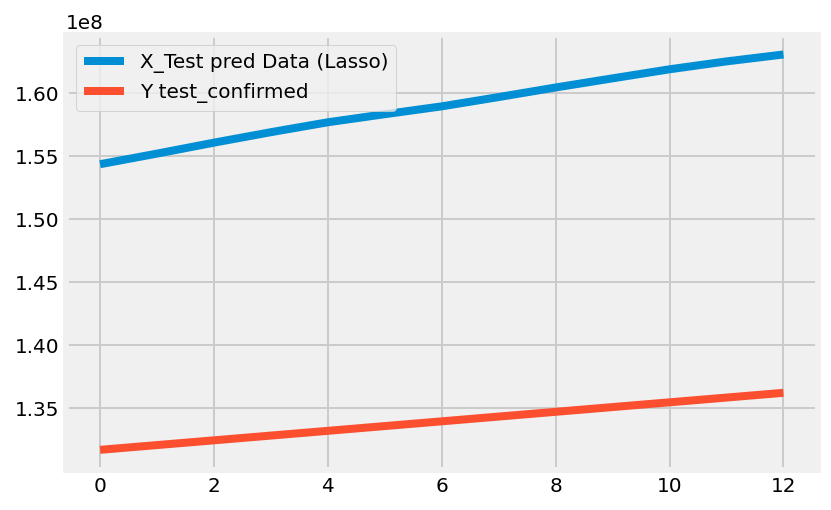

In [42]:
# check against testing data
lasso_test_pred = lasso.predict(X_test_confirmed)
plt.plot(y_test_confirmed) #Y test_confirmed
plt.plot(lasso_test_pred) #X_Test pred Data
plt.legend(['X_Test pred Data (Lasso)', 'Y test_confirmed'])
print('MAE:', mean_absolute_error(lasso_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(lasso_test_pred, y_test_confirmed))

error rate high in this case of lasso regressor .

### SVM 

support vector machine is a supervised learning allgorithm ,used for classification

In [70]:
# # use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

we used the optimization technique RandomizedSearchCV.for finr tuning the parameters.

In [75]:
# svm_search.best_params_

In [82]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 26656898.392717138
MSE: 713016740545692.5


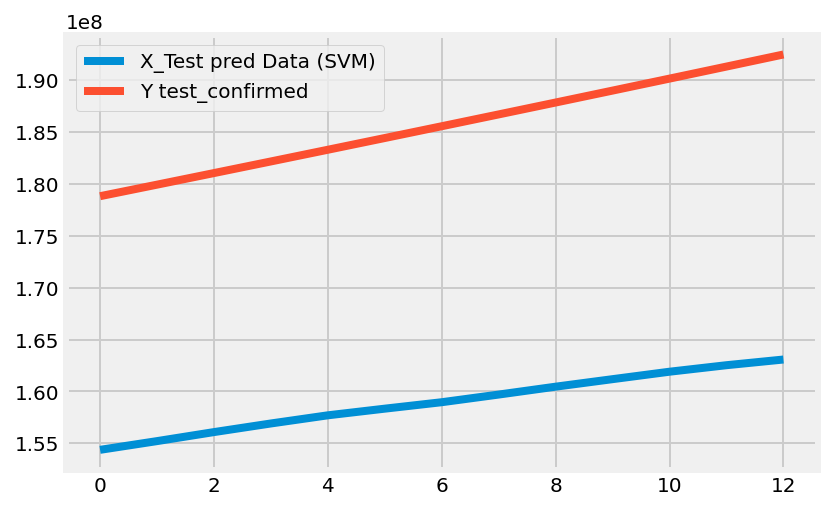

In [87]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed) #Y test_confirmed
plt.plot(svm_test_pred) #X_Test pred Data
plt.legend(['X_Test pred Data (SVM)', 'Y test_confirmed'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [88]:
r2_score(y_test_confirmed,svm_test_pred)

-95.81310152446268

In [89]:
print("R2 score : %.2f" % r2_score(y_test_confirmed,svm_test_pred))

R2 score : -95.81


### Polynomial and bayesian regression 

In [90]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [91]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 9611216.11372585
MSE: 94586548005459.42


In [92]:
print(linear_model.coef_)

[[-9.51226468e+06  2.64870374e+05 -2.28229159e+03  1.05999901e+01
  -1.15442714e-02]]


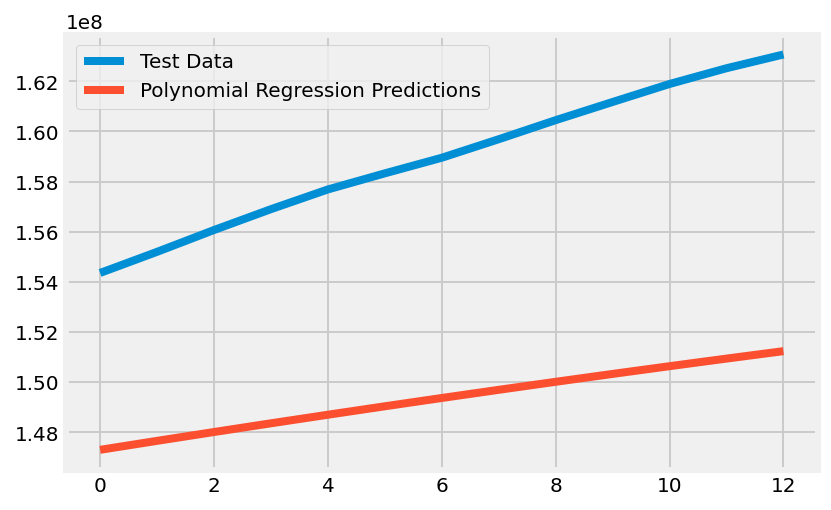

In [93]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [94]:
r2_score(y_test_confirmed,test_linear_pred)

-11.842920164669234

In [95]:
print("R2 score : %.2f" % r2_score(y_test_confirmed,test_linear_pred))

R2 score : -11.84


###  Bayesian ridge polynomial regression

Polynomial regression is used for predicting continous values.so it fits well in this application.

In [98]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [99]:
bayesian_search.best_params_

{'tol': 0.01,
 'normalize': True,
 'lambda_2': 1e-07,
 'lambda_1': 0.001,
 'alpha_2': 1e-05,
 'alpha_1': 1e-07}

In [100]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 8823874.731900353
MSE: 79775531406094.16


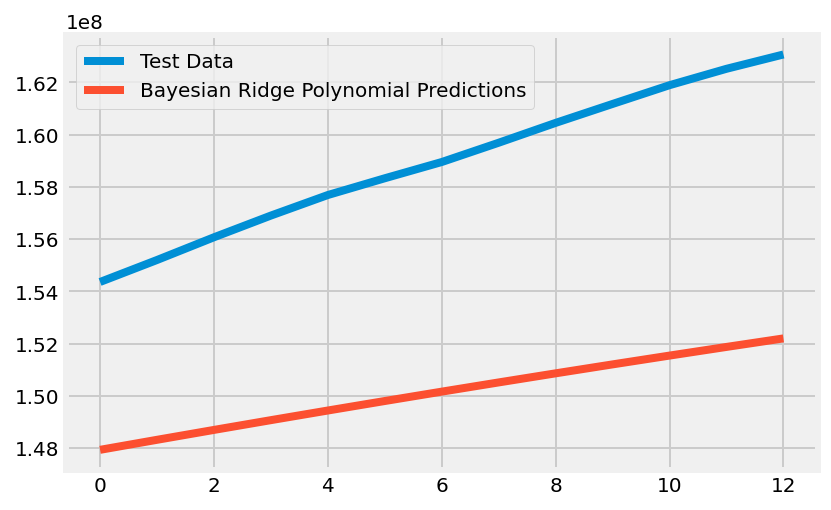

In [101]:
plt.plot(y_test_confirmed) # test data
plt.plot(test_bayesian_pred) #bayesian
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [102]:
r2_score(y_test_confirmed,test_bayesian_pred)

-9.831886801529057

## Worldwide overview 

Graphing the worldwide corona confimed cases and mortality rates.This gives us a big picture of the ongoing pandemic.

In [103]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a


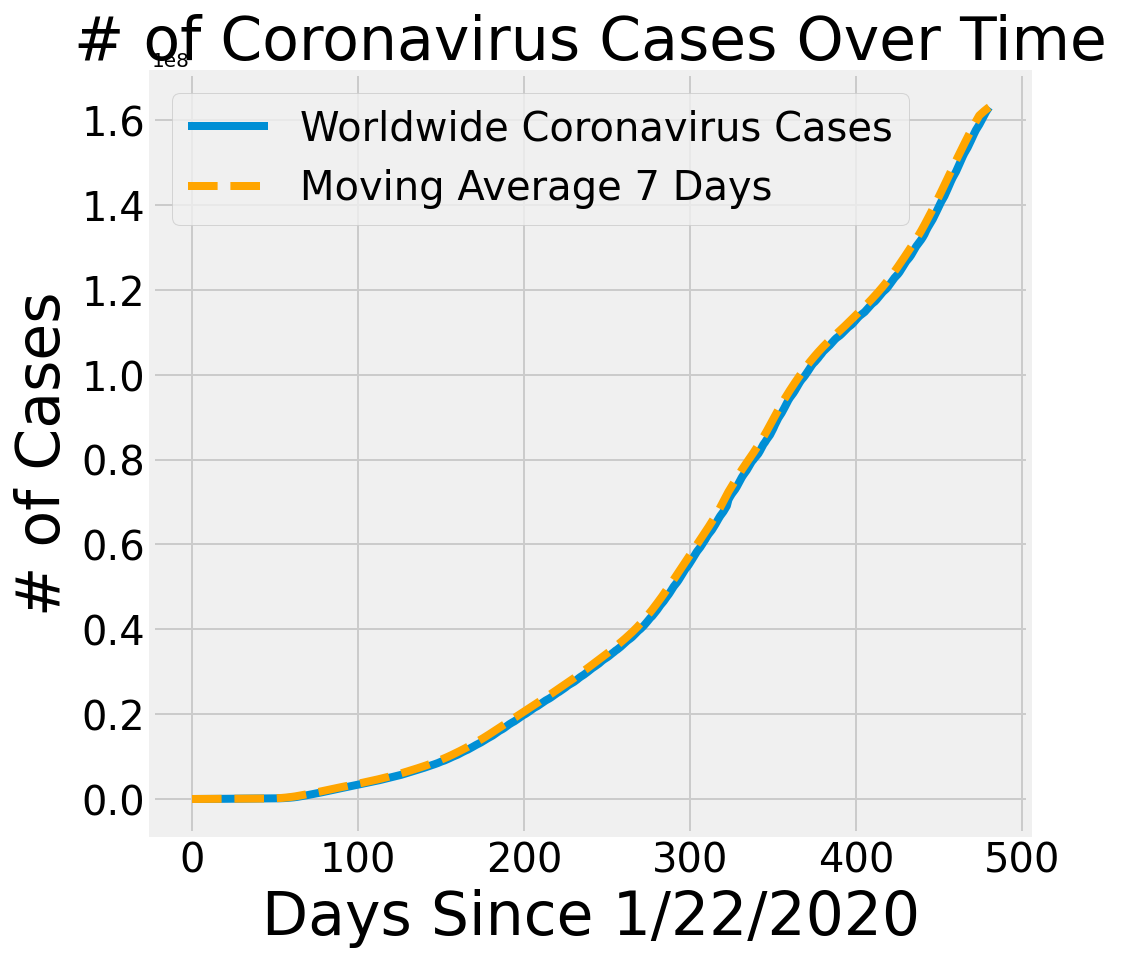

In [104]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(7, 7))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

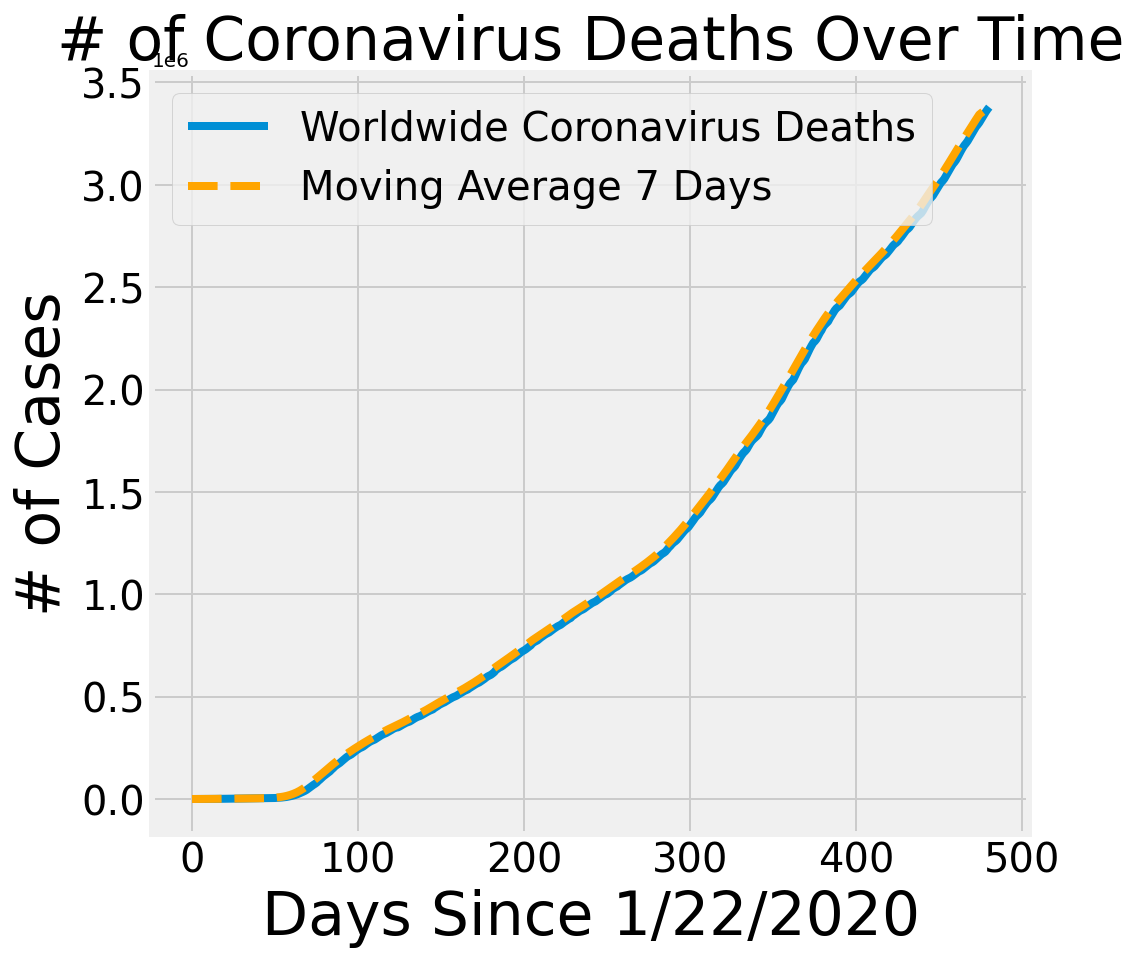

In [105]:
plt.figure(figsize=(7, 7))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

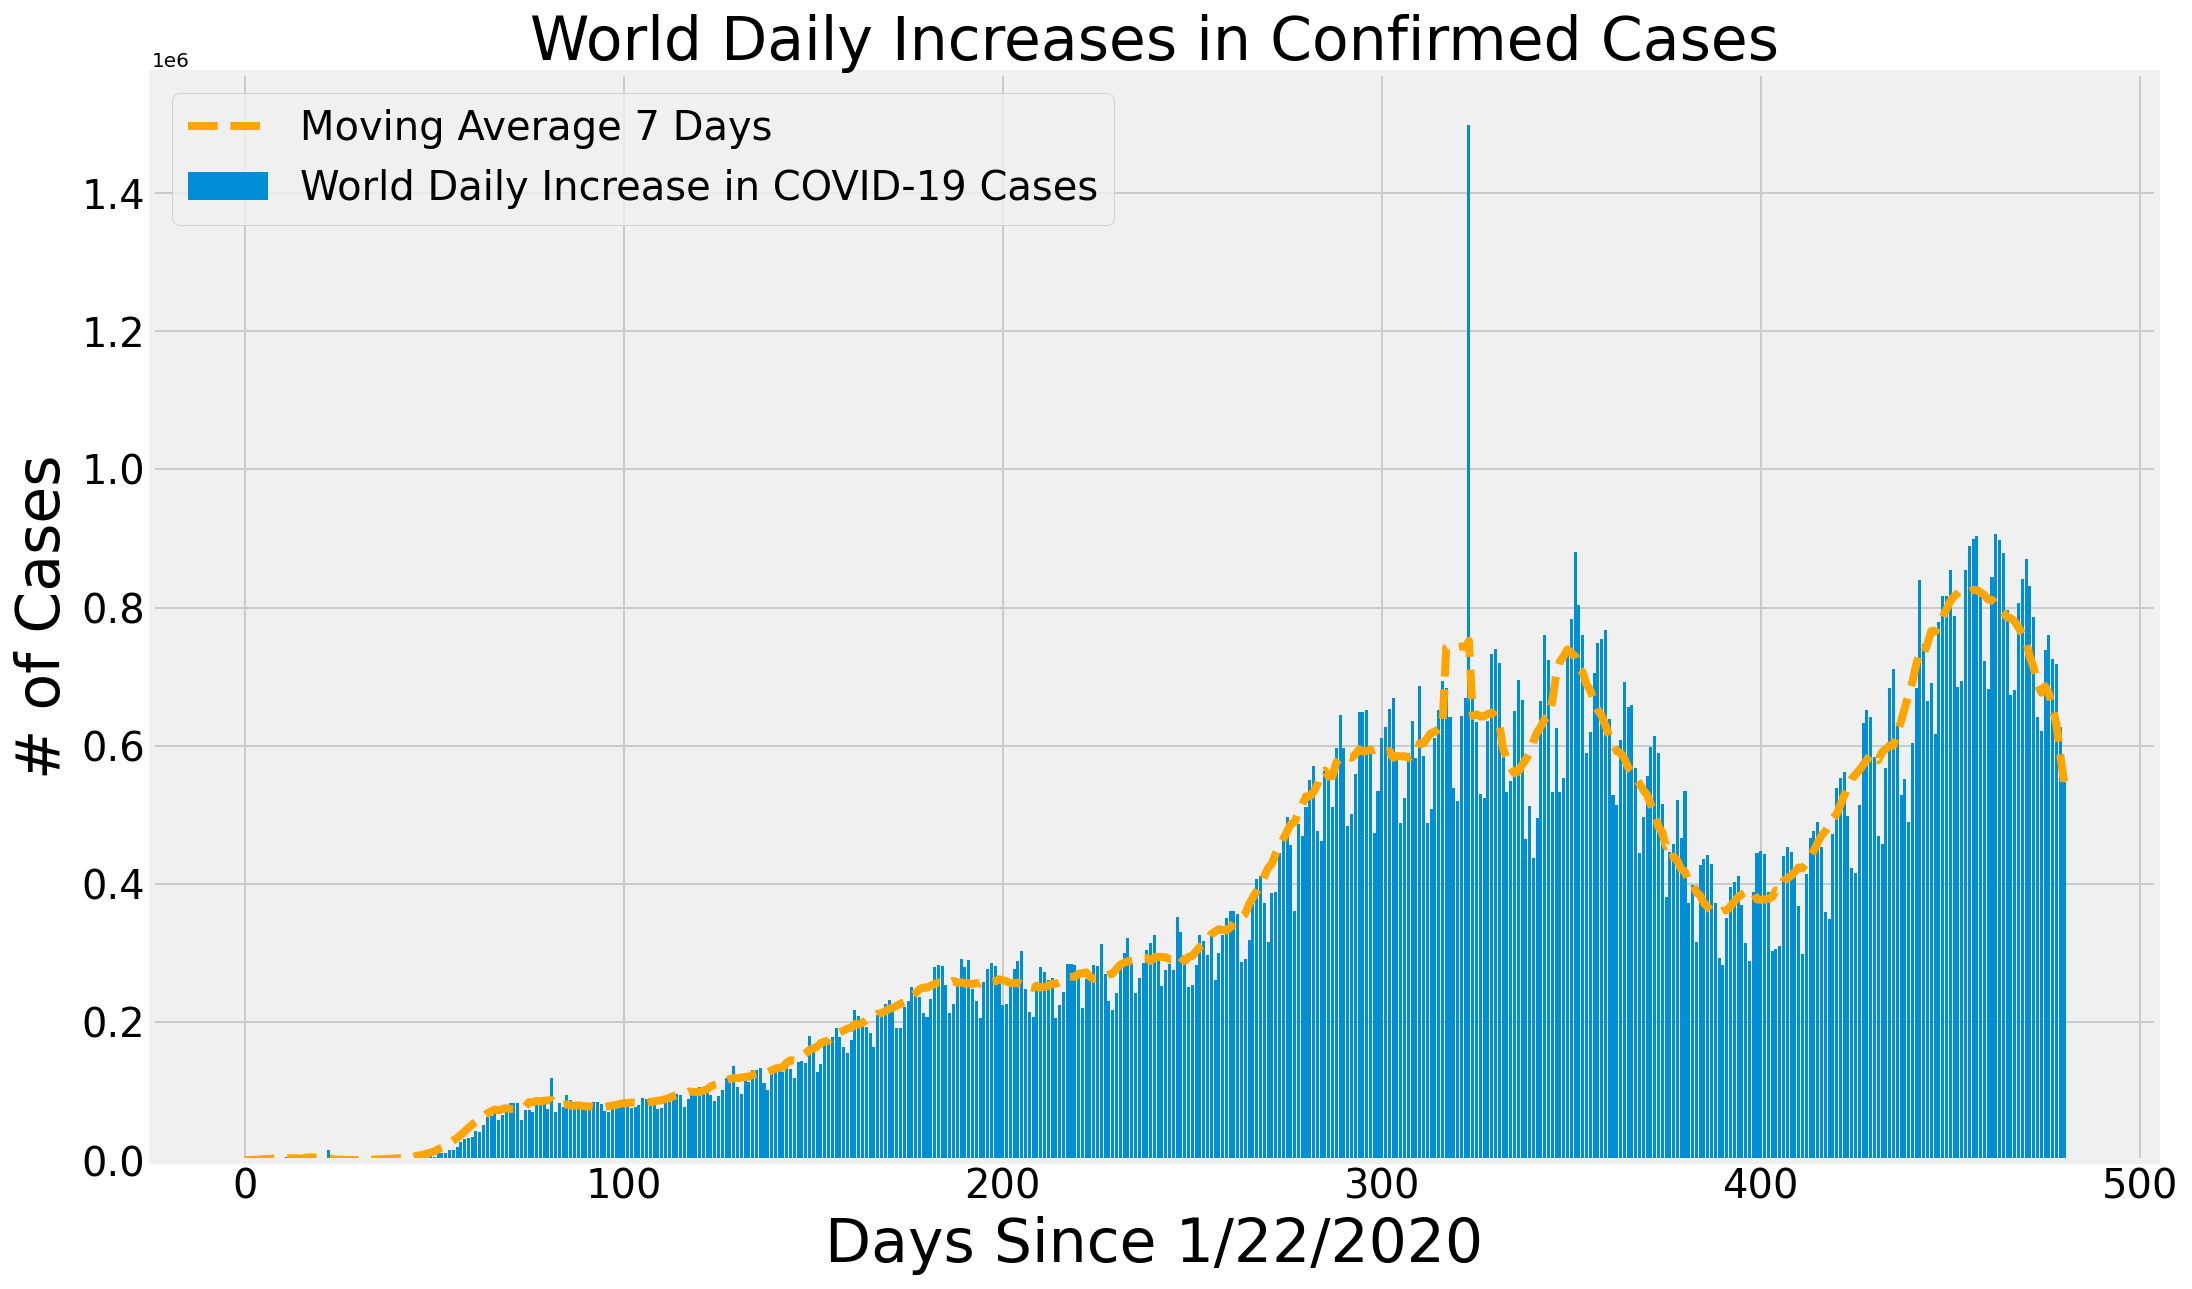

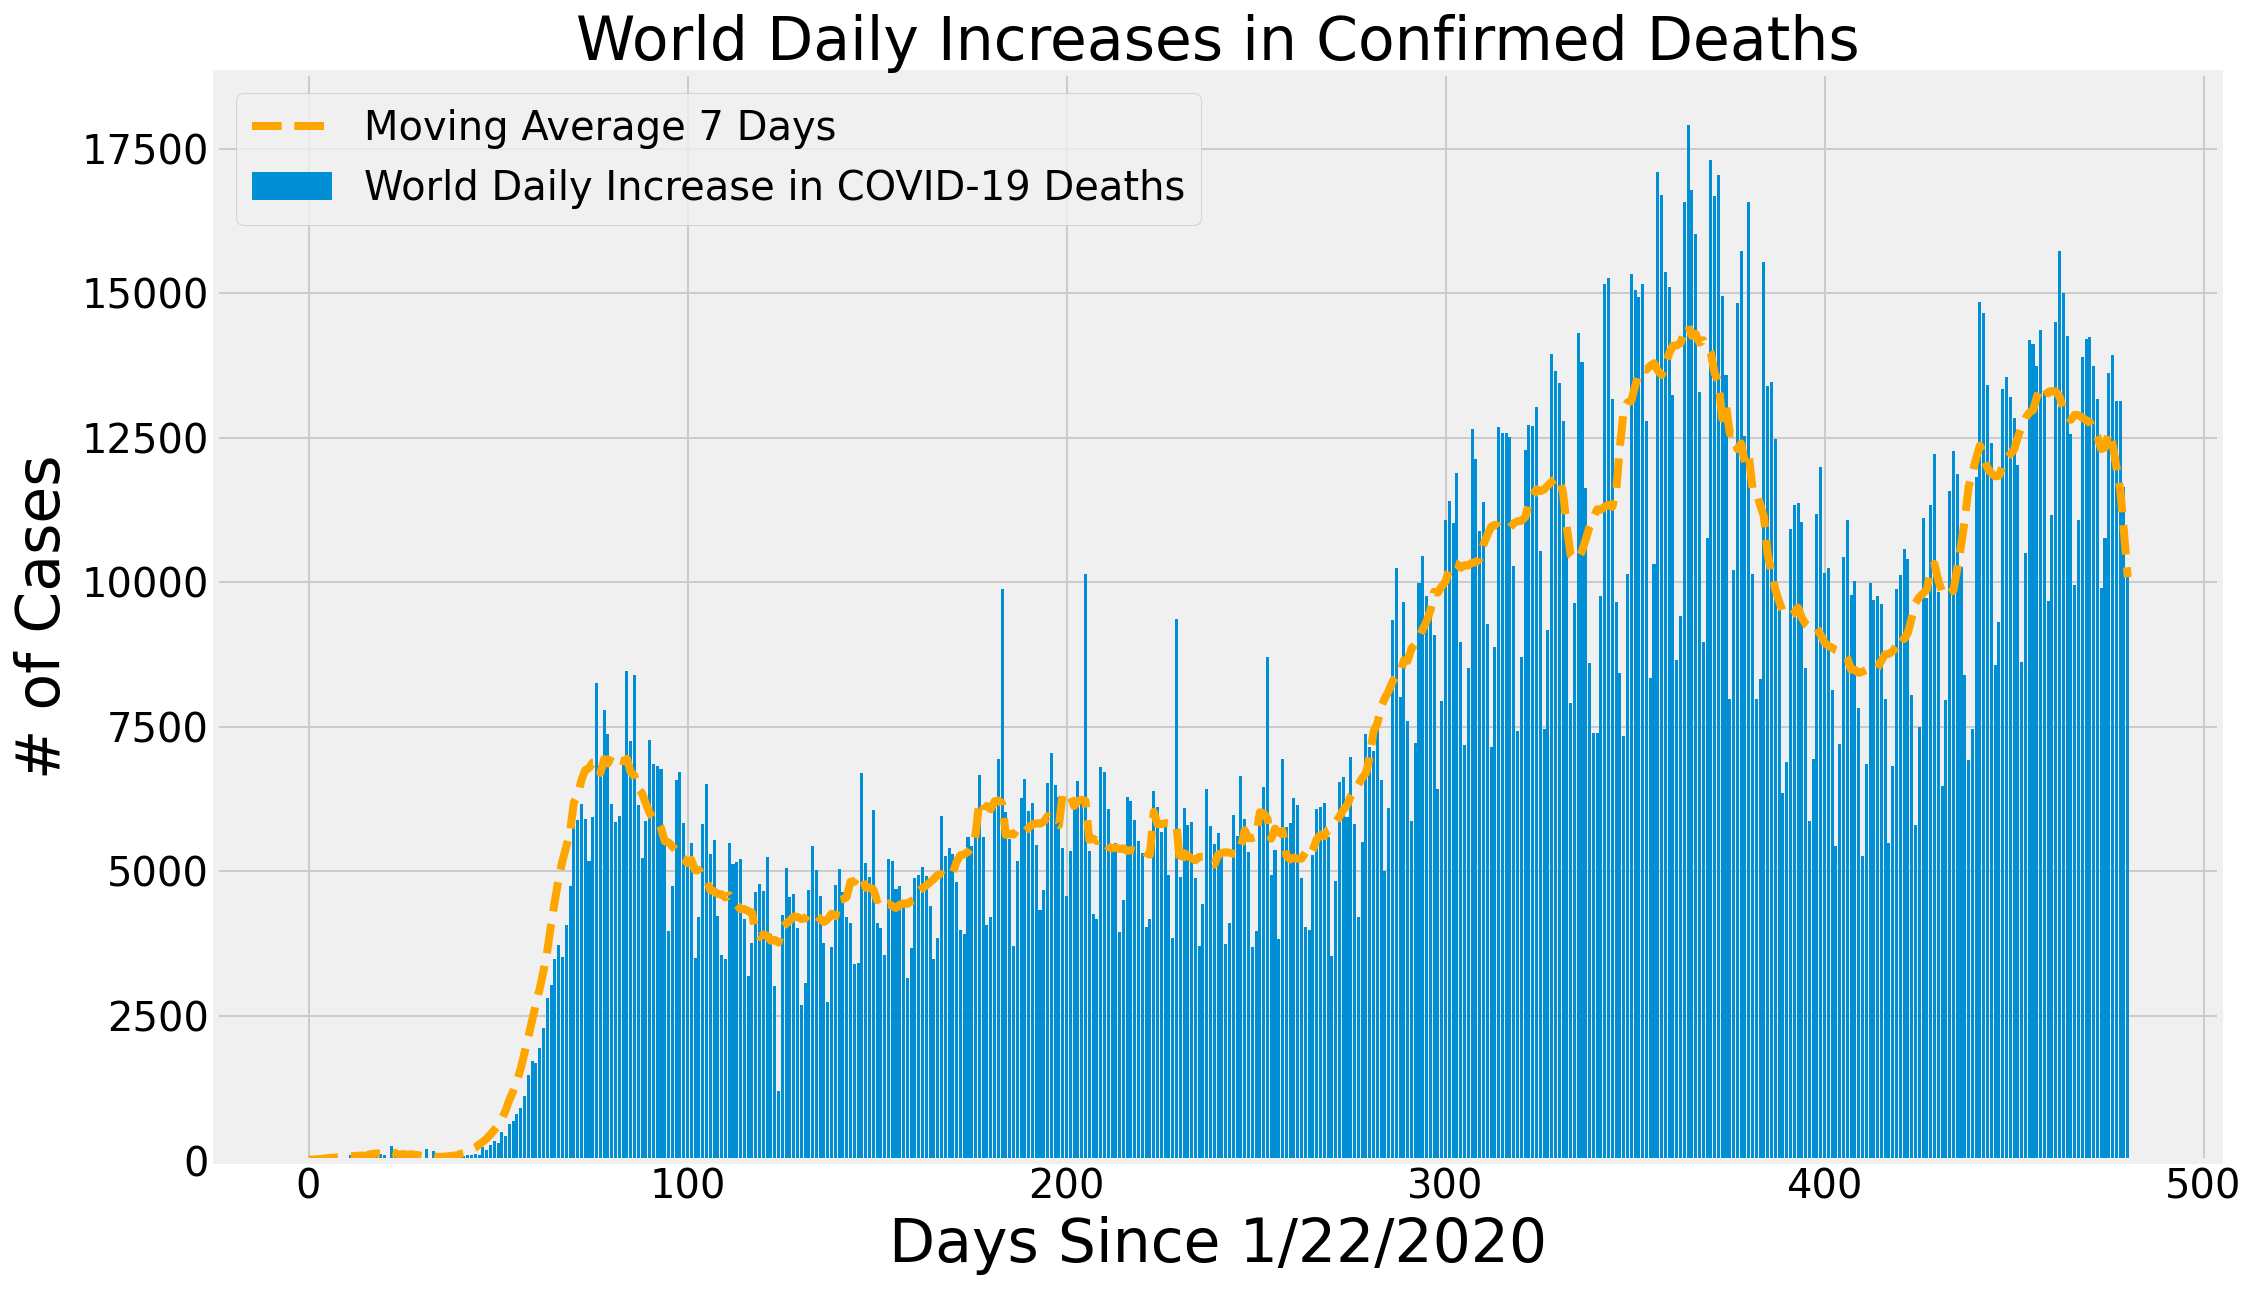

In [63]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [64]:
def country_plot(x, y1, y2, y3, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
#     recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [65]:
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)
    

In [66]:
confirmed_df[confirmed_df['Country/Region']=='Australia']['5/1/21'].sum()

29824

In [67]:
confirmed_df['Country/Region'].head(50)

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
5        Antigua and Barbuda
6                  Argentina
7                    Armenia
8                  Australia
9                  Australia
10                 Australia
11                 Australia
12                 Australia
13                 Australia
14                 Australia
15                 Australia
16                   Austria
17                Azerbaijan
18                   Bahamas
19                   Bahrain
20                Bangladesh
21                  Barbados
22                   Belarus
23                   Belgium
24                    Belize
25                     Benin
26                    Bhutan
27                   Bolivia
28    Bosnia and Herzegovina
29                  Botswana
30                    Brazil
31                    Brunei
32                  Bulgaria
33              Burkina Faso
34            

###  Country Specific Graphs 

Unlike the previous section, we are taking a look at specific countries. This allows us to examine the pandemic at a local level.

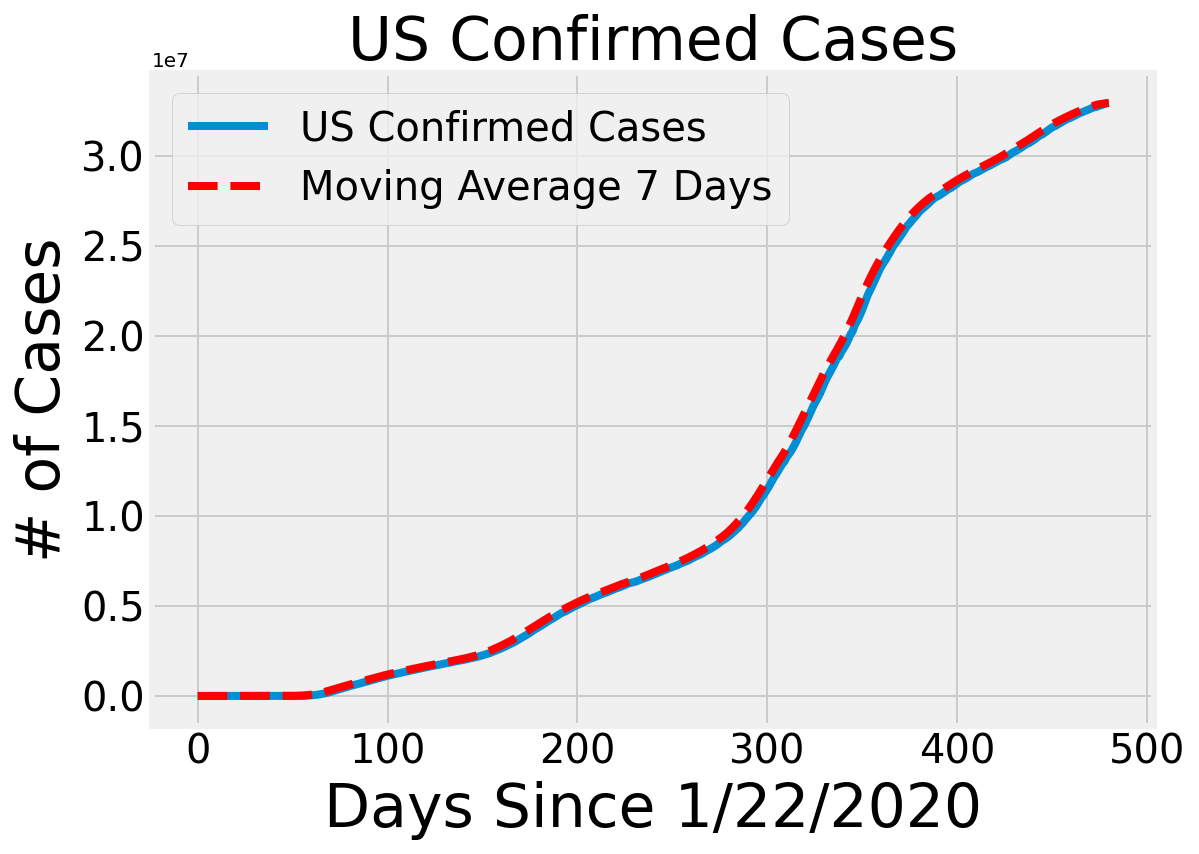

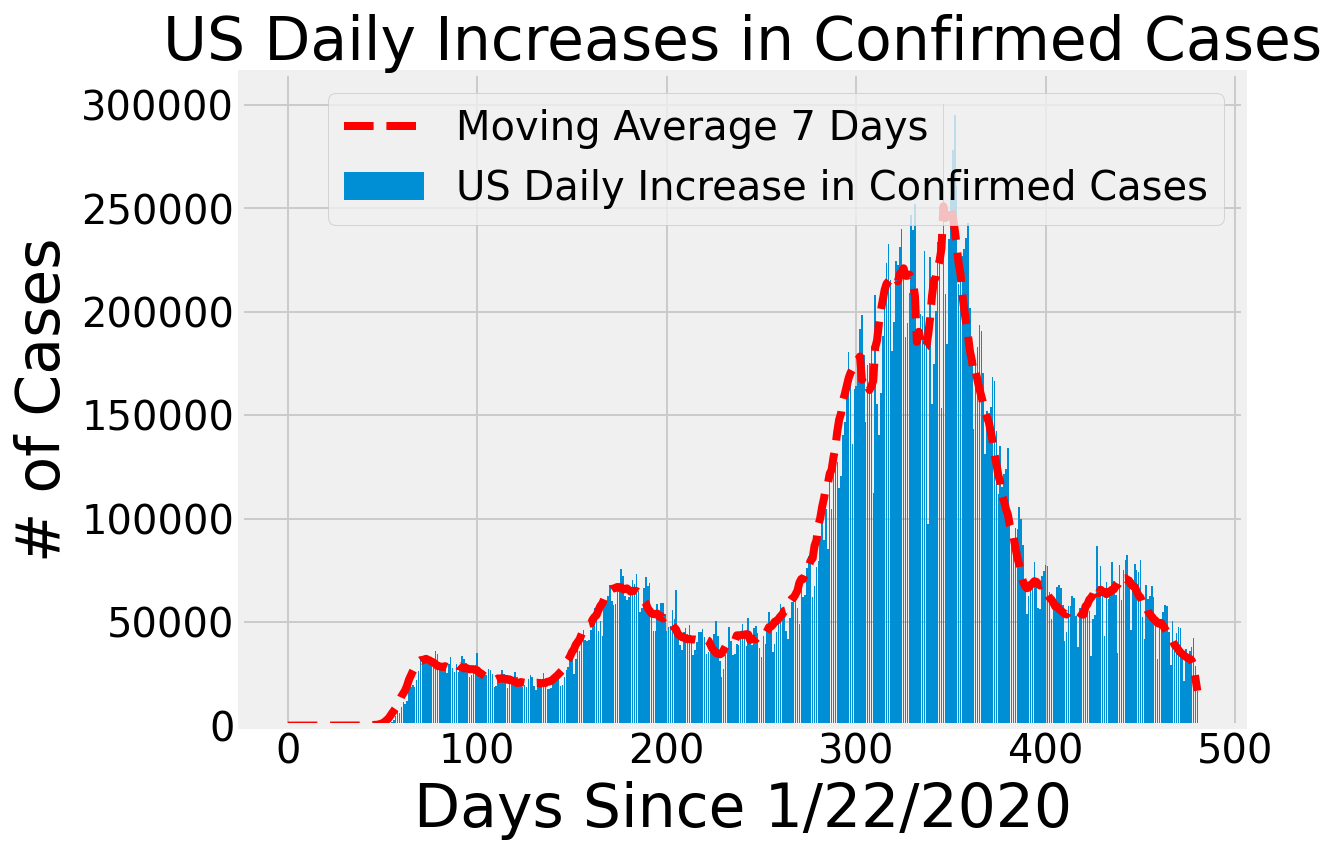

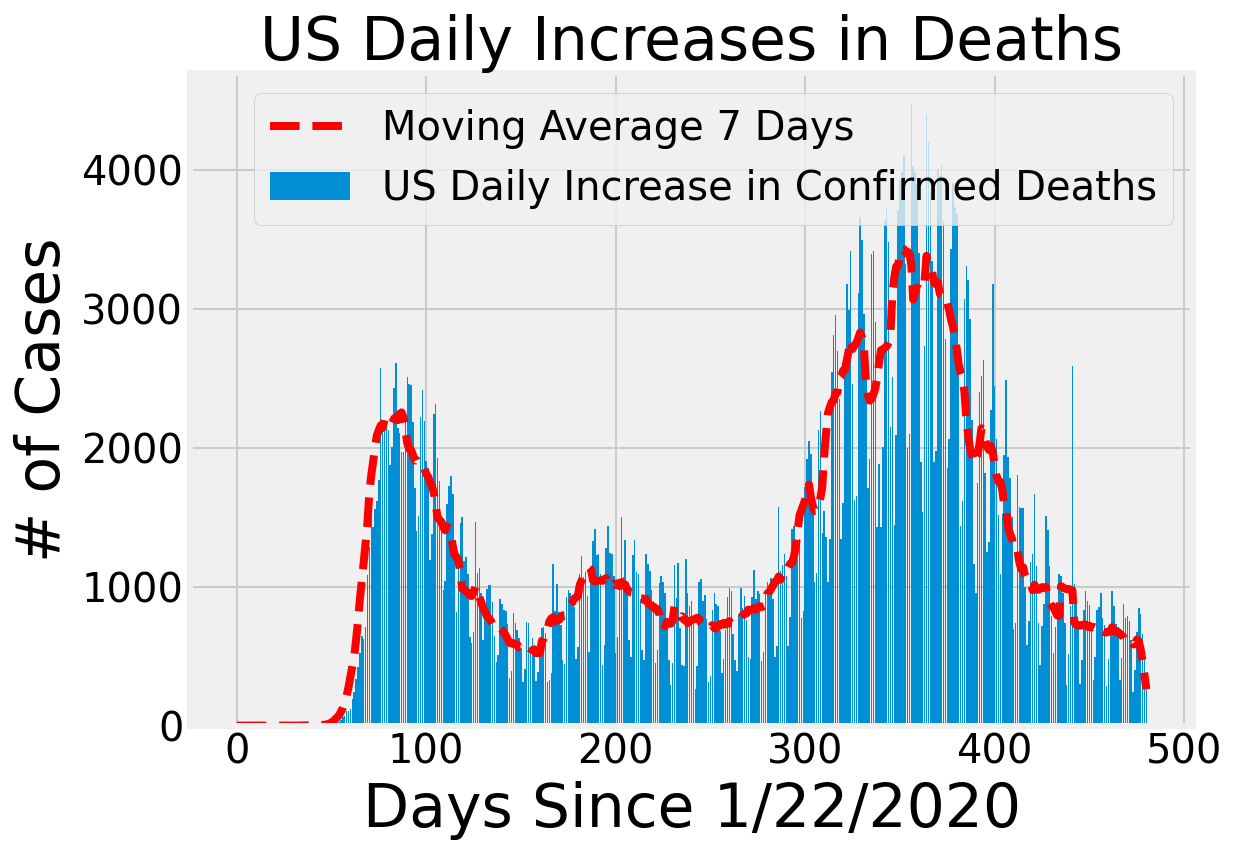

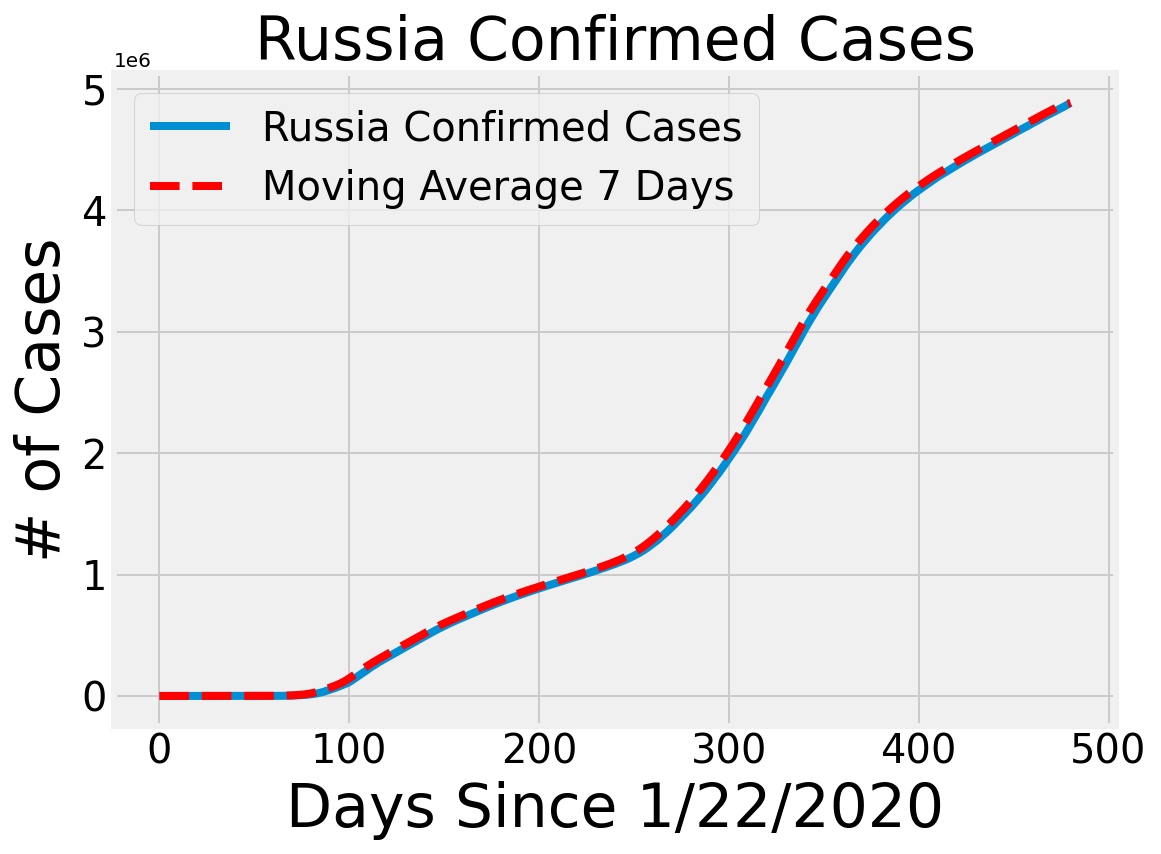

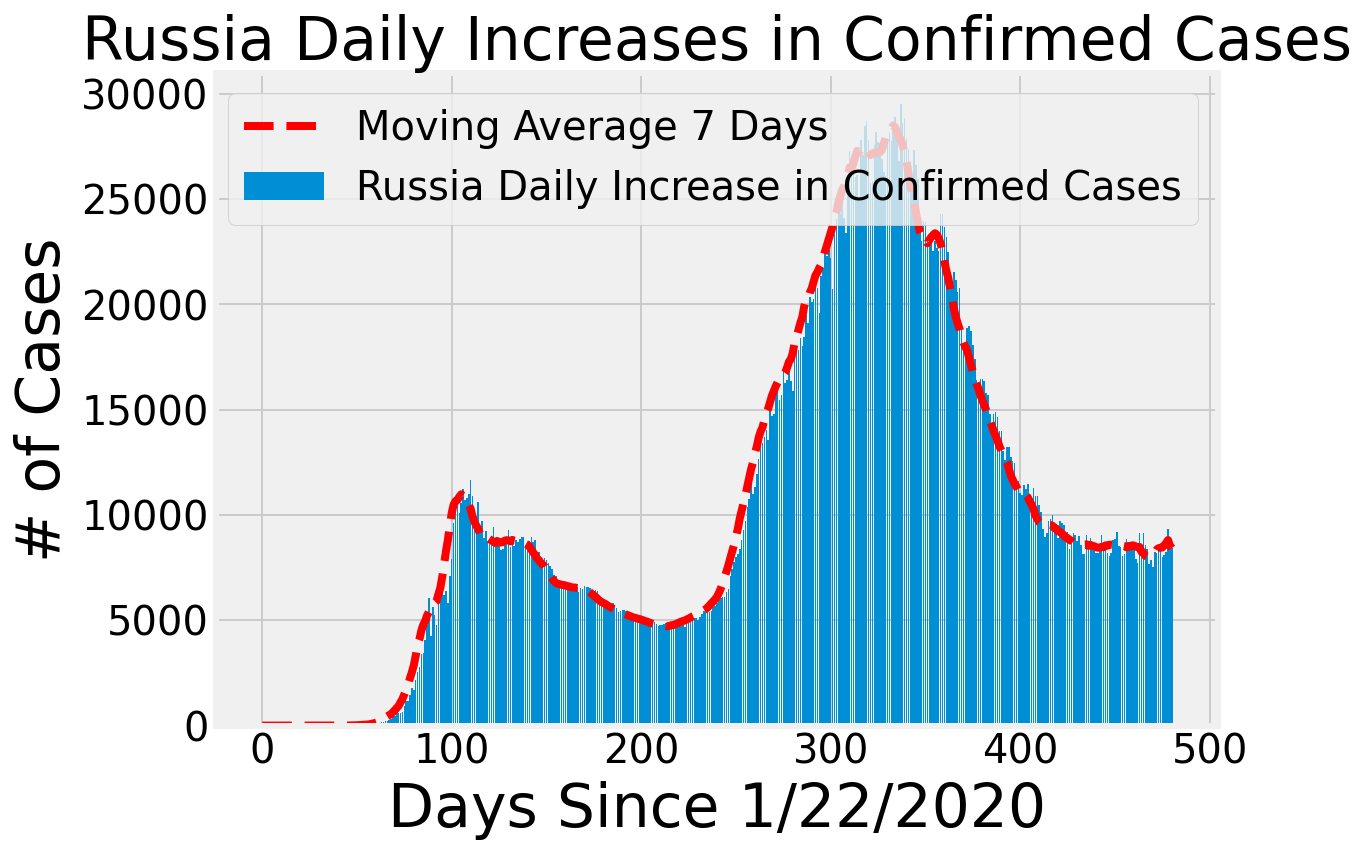

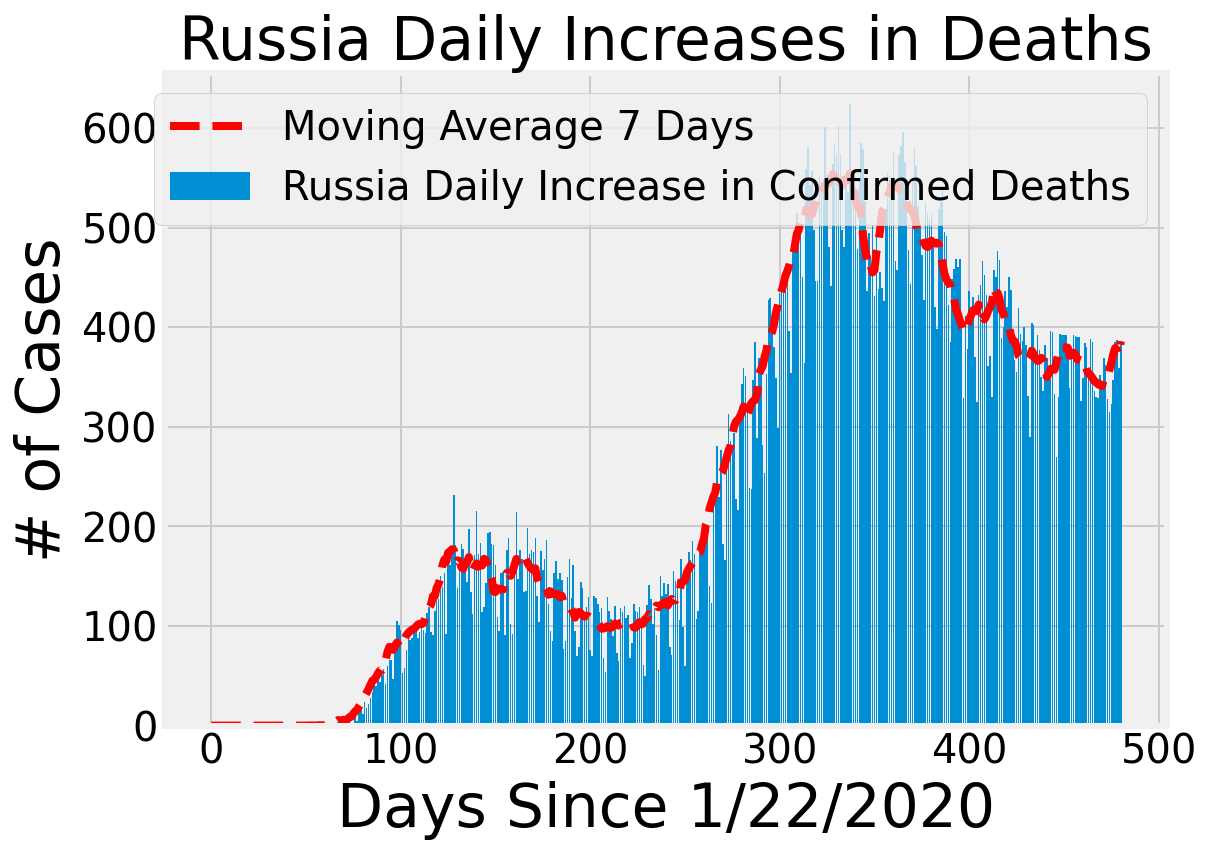

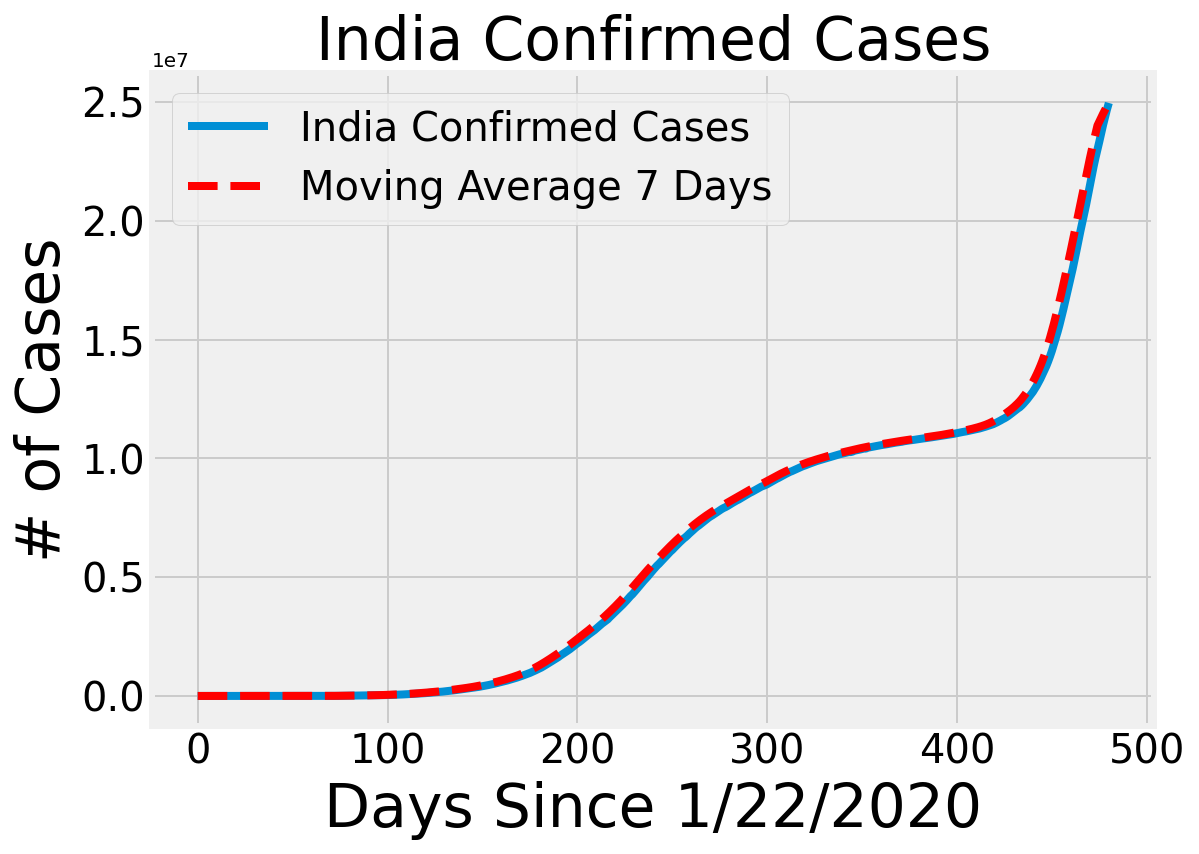

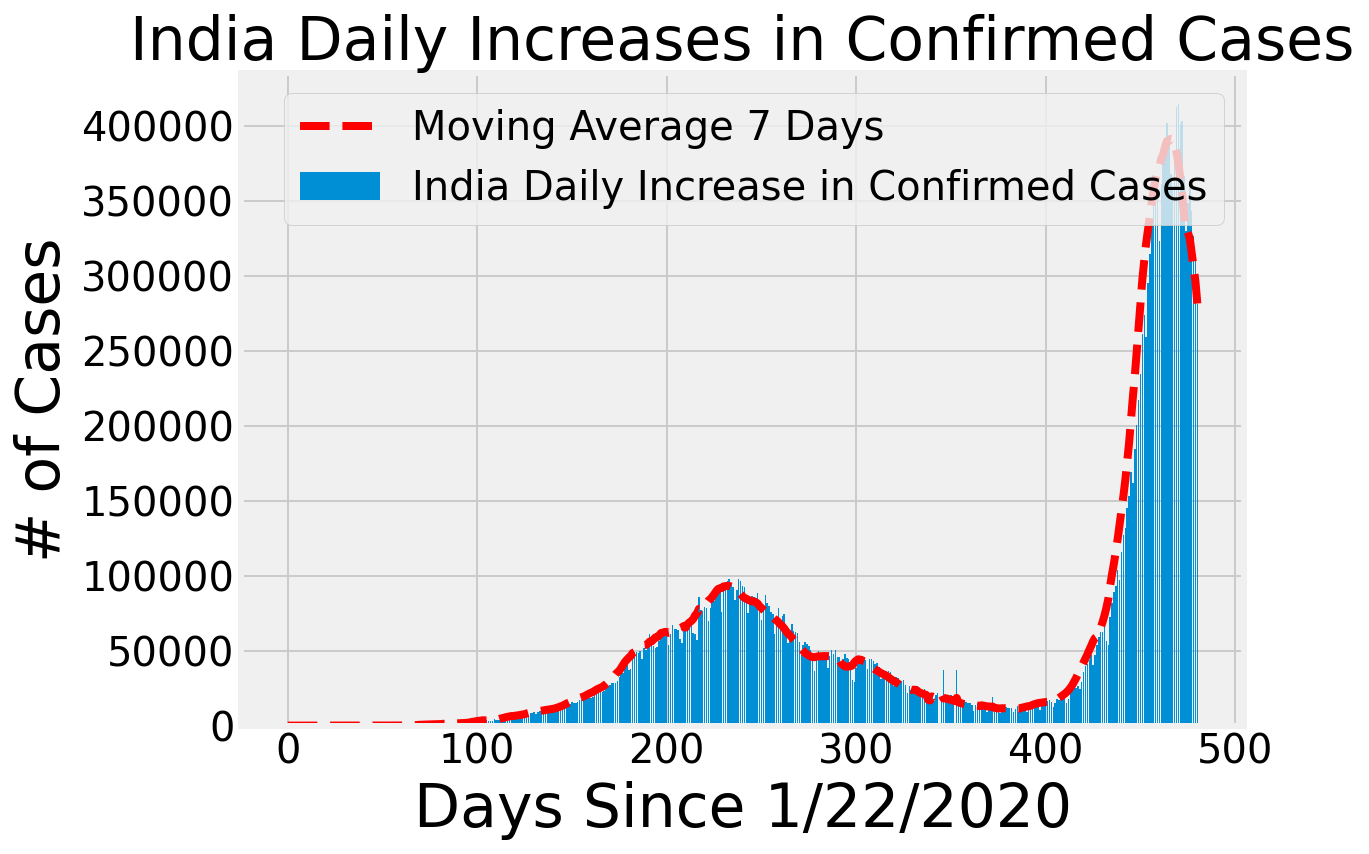

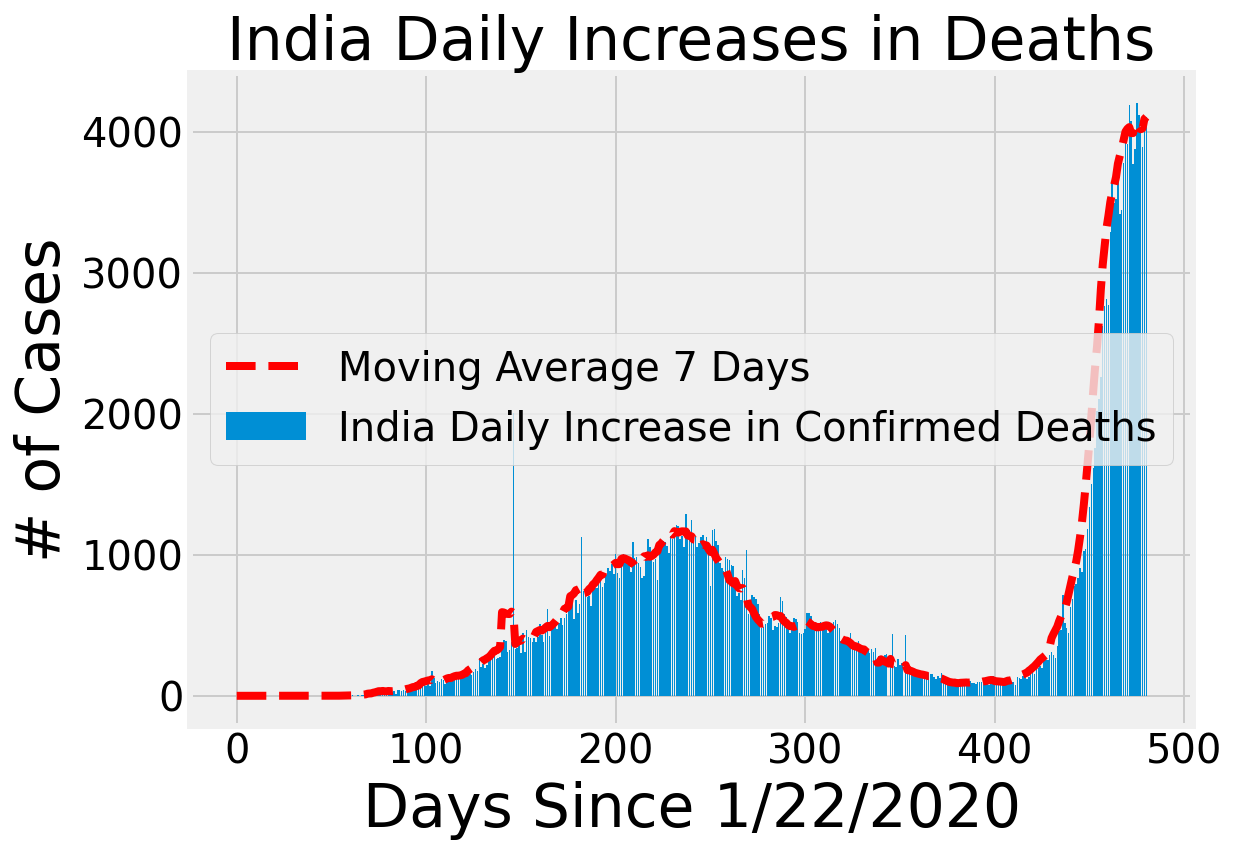

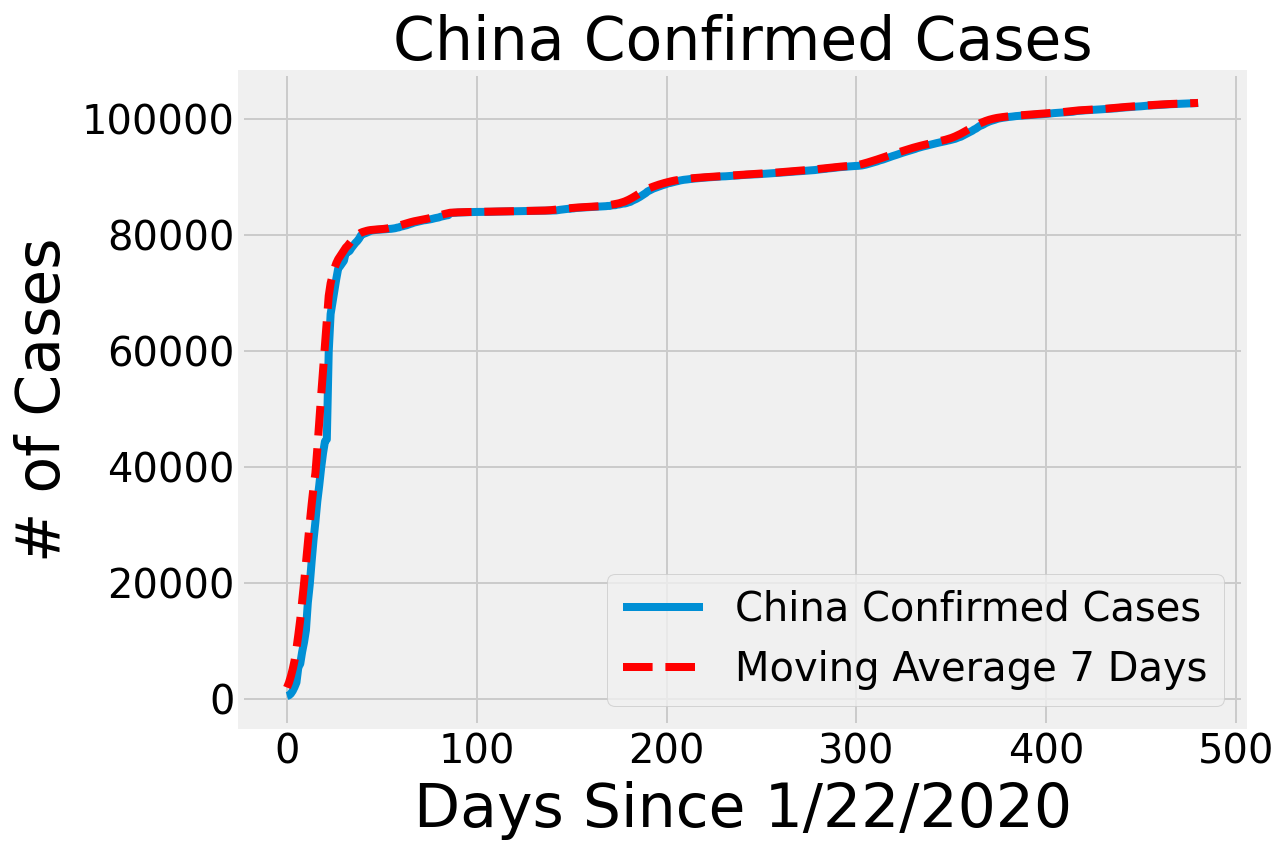

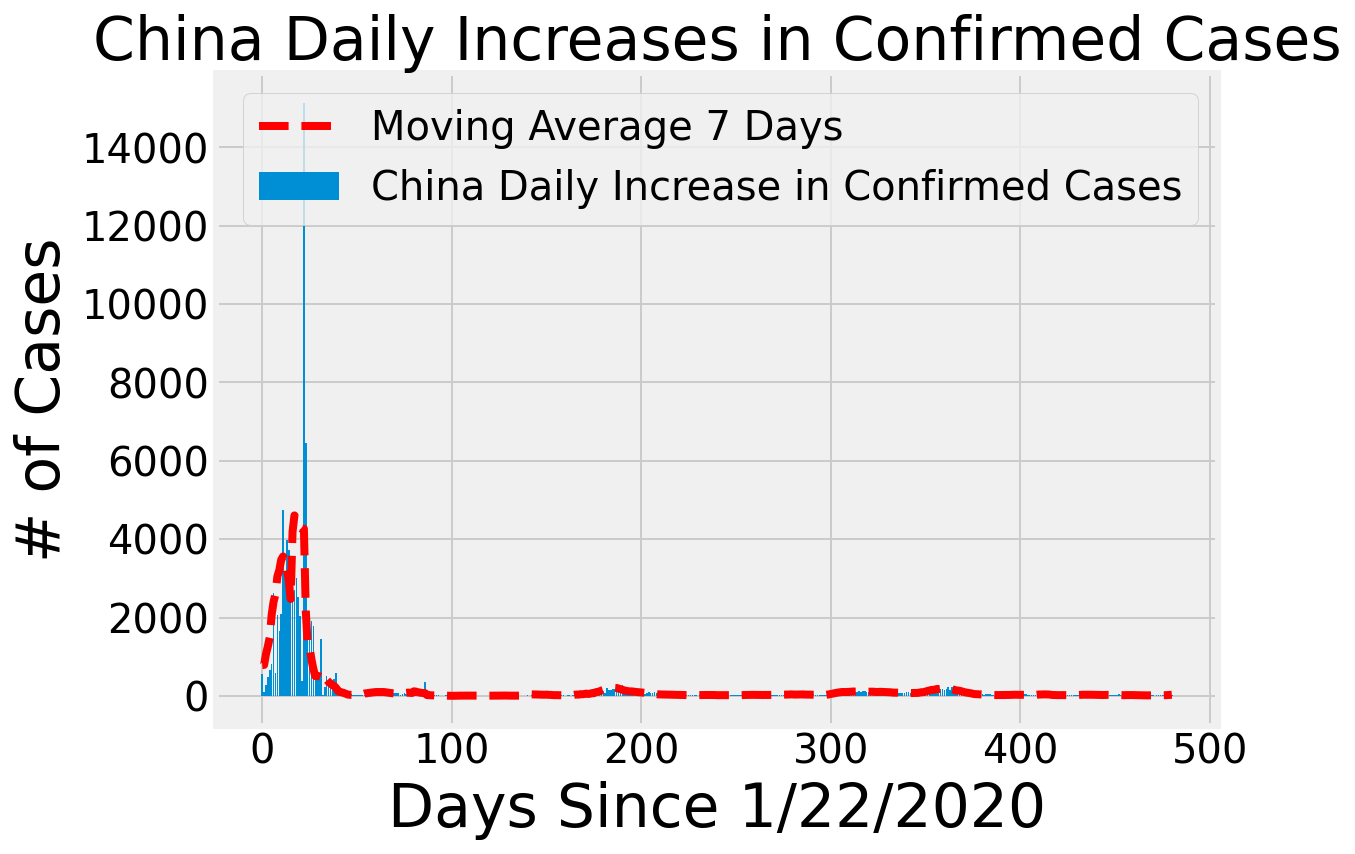

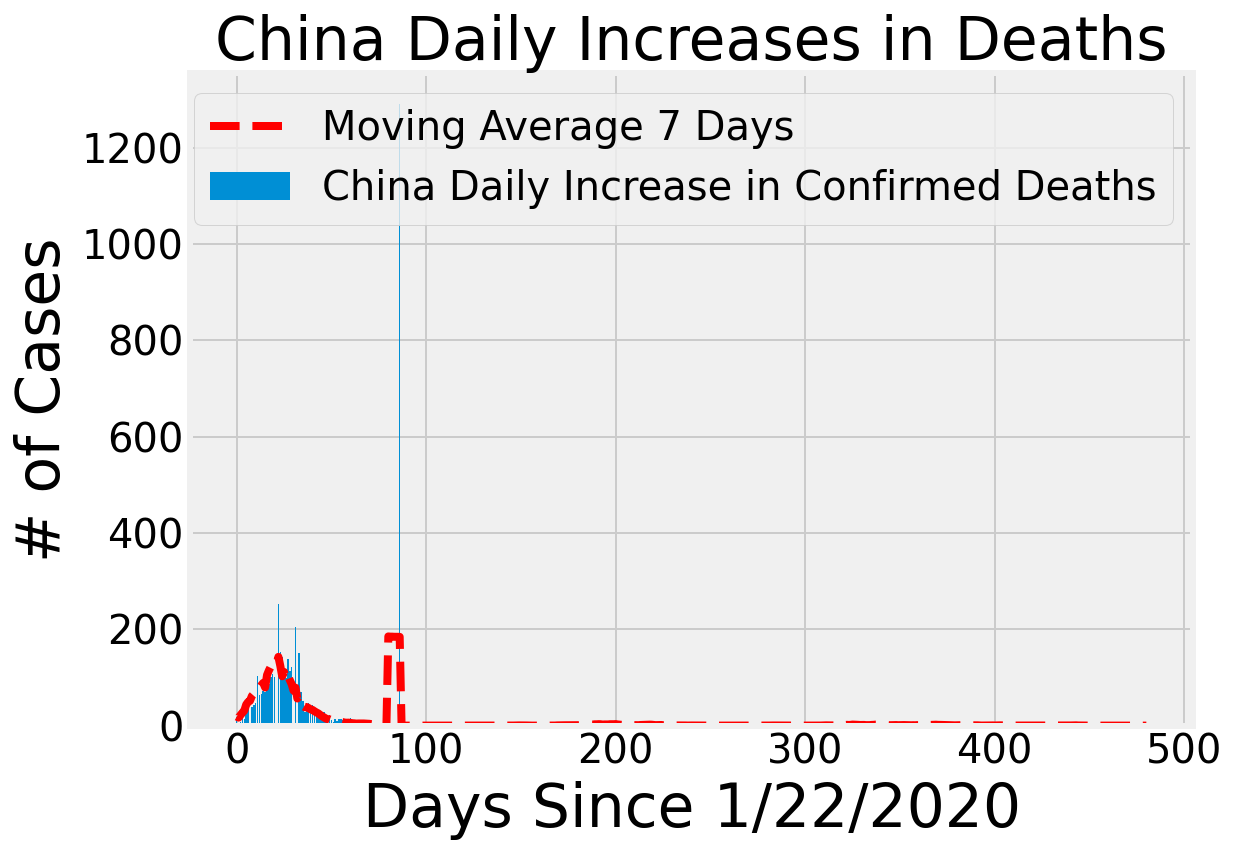

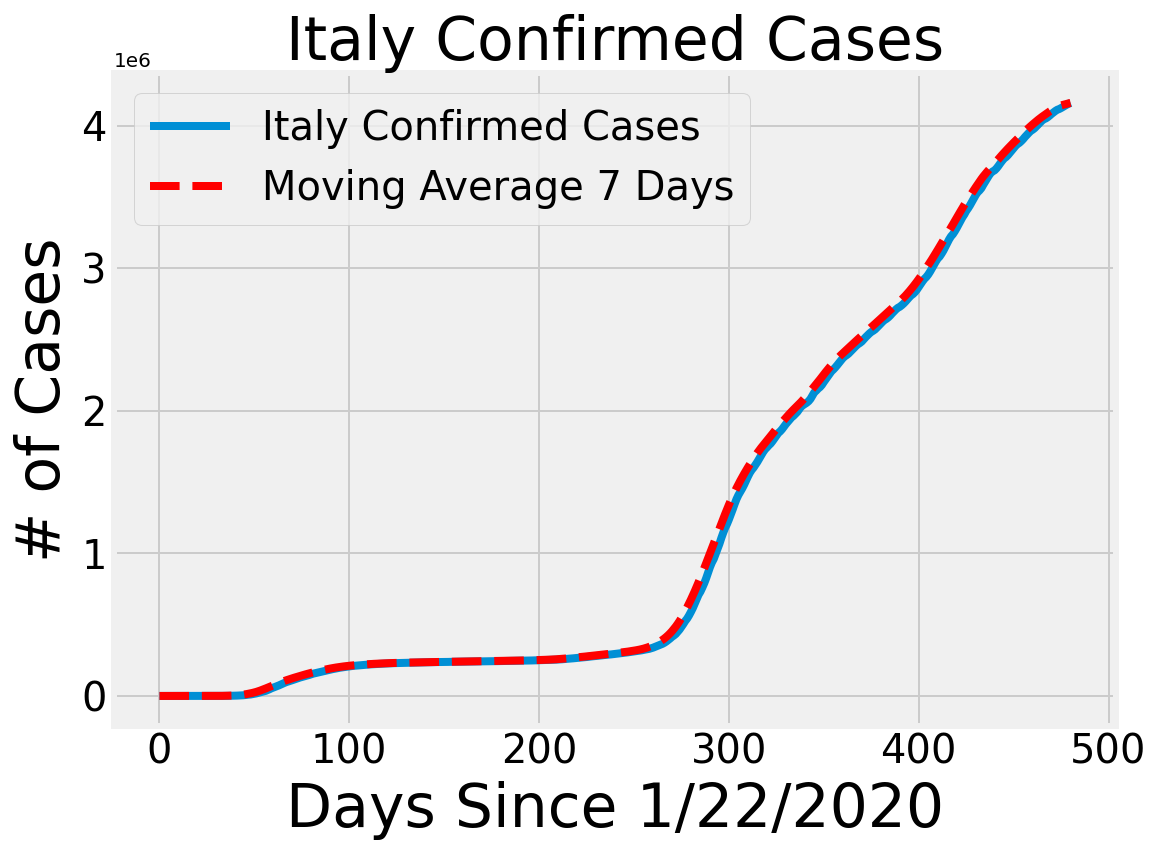

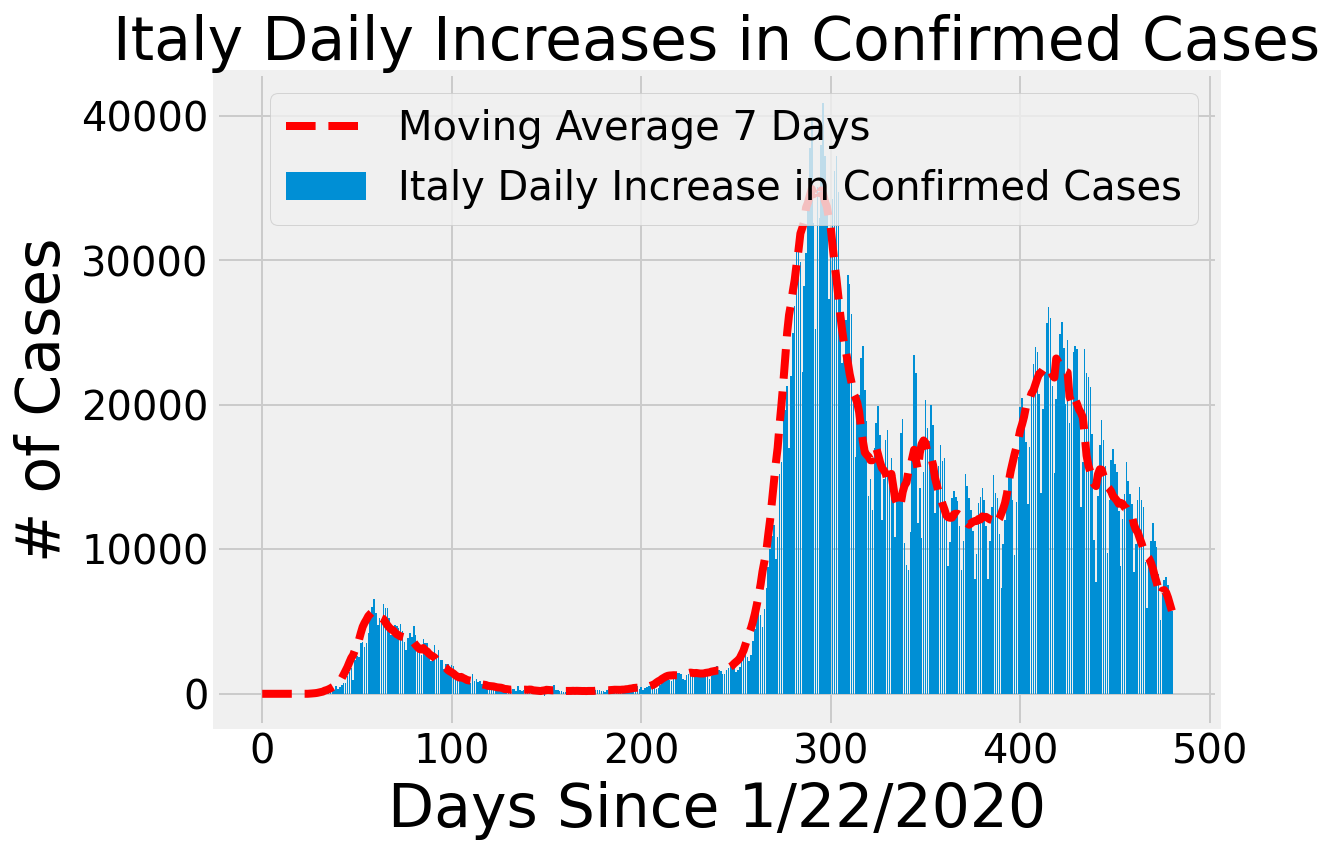

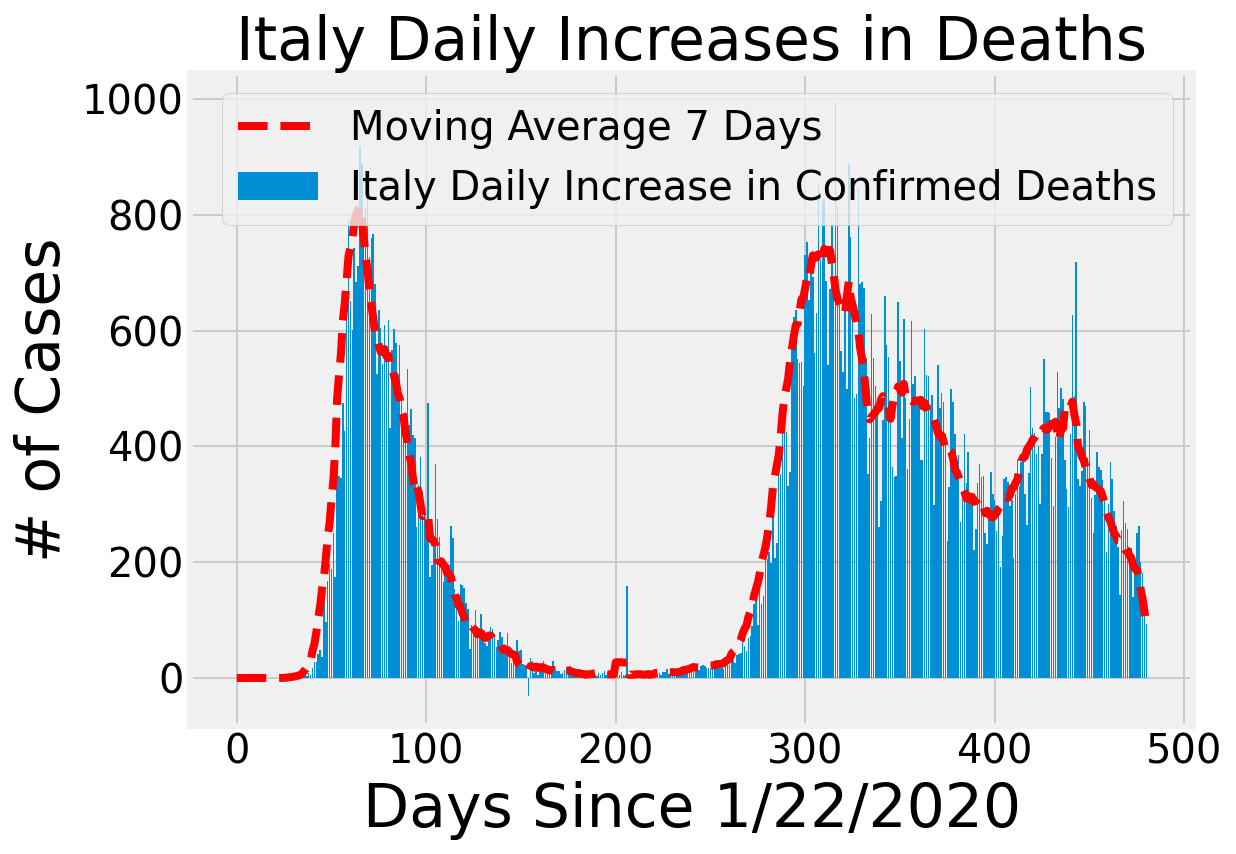

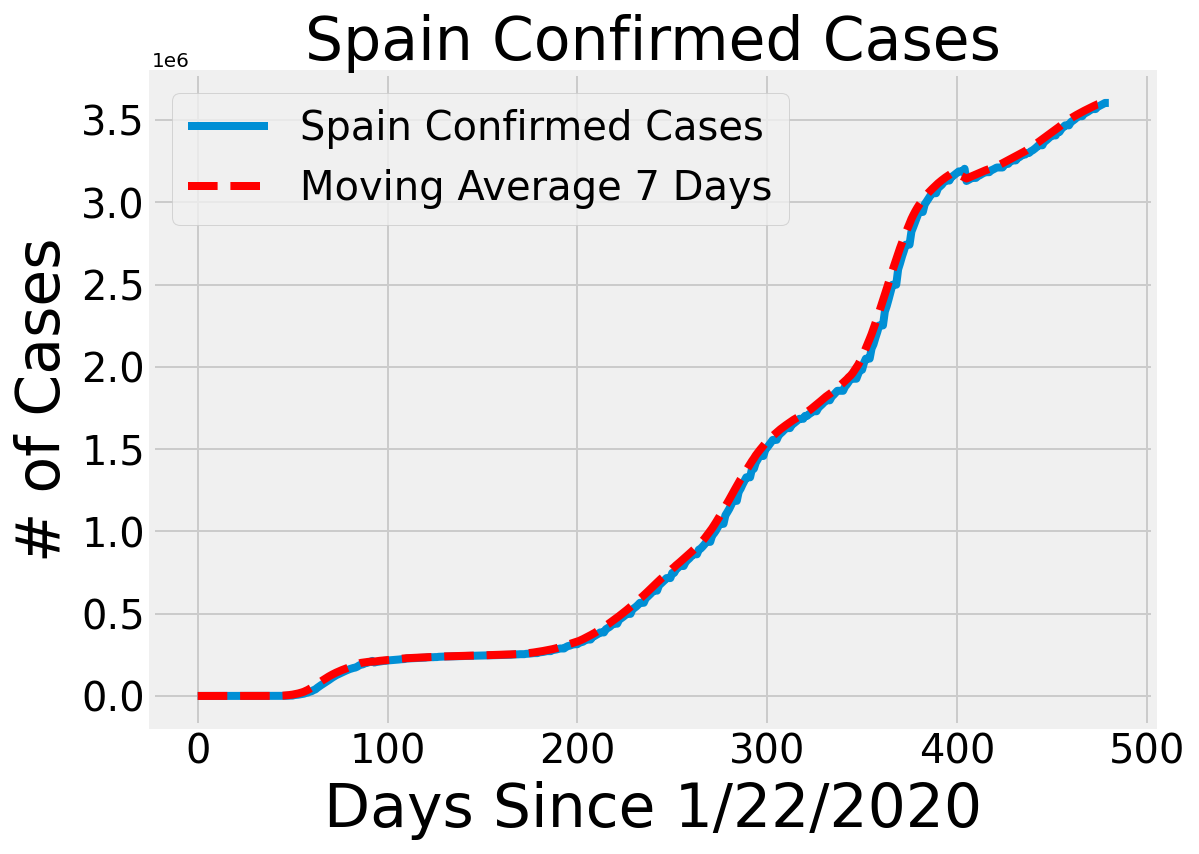

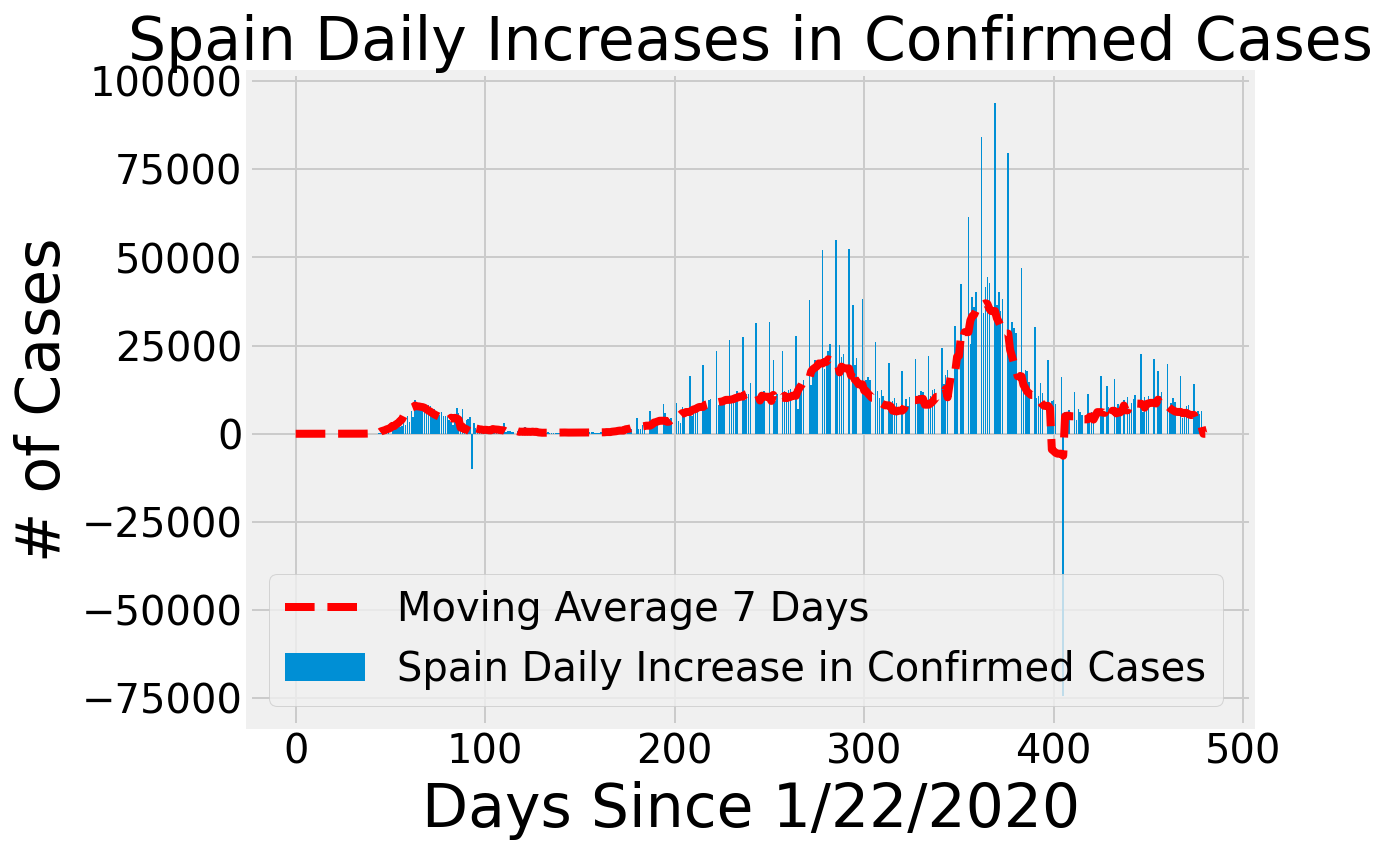

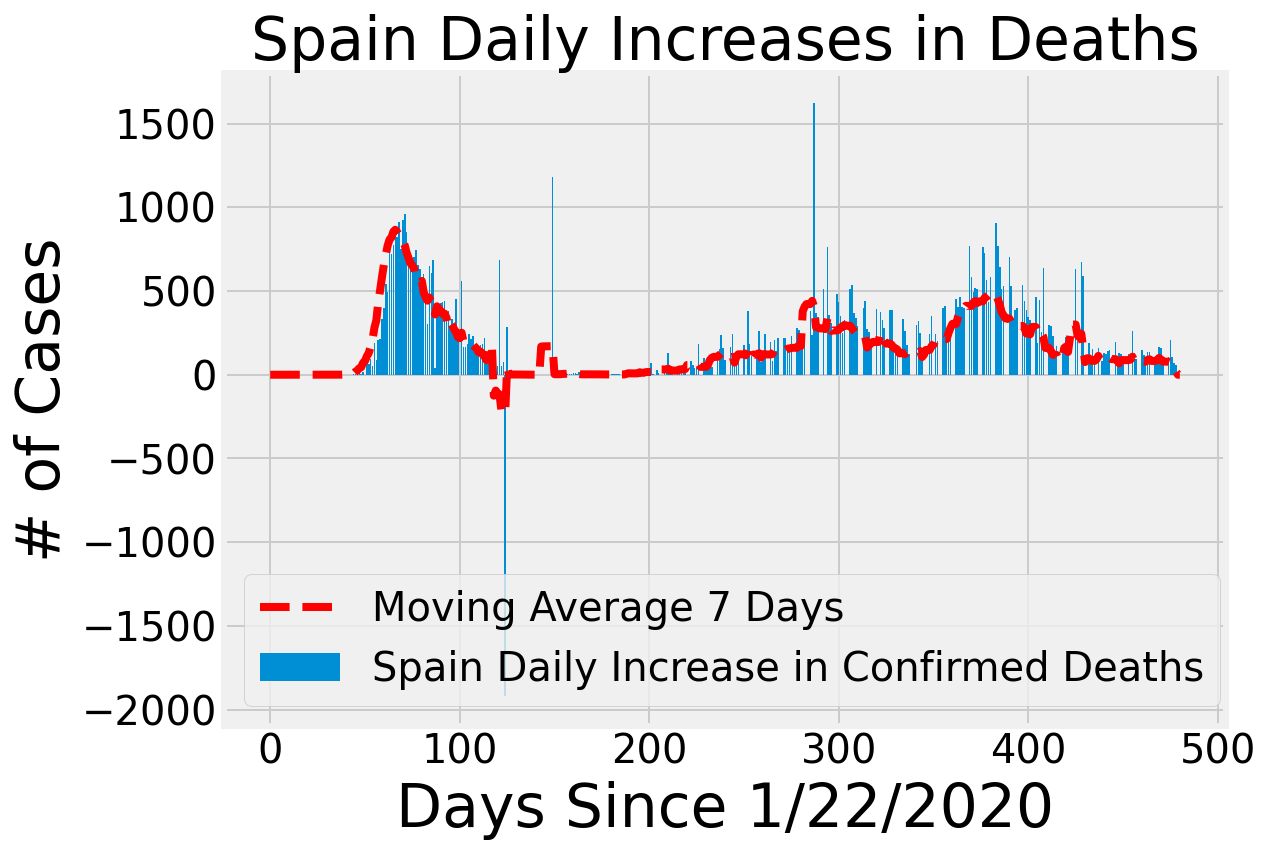

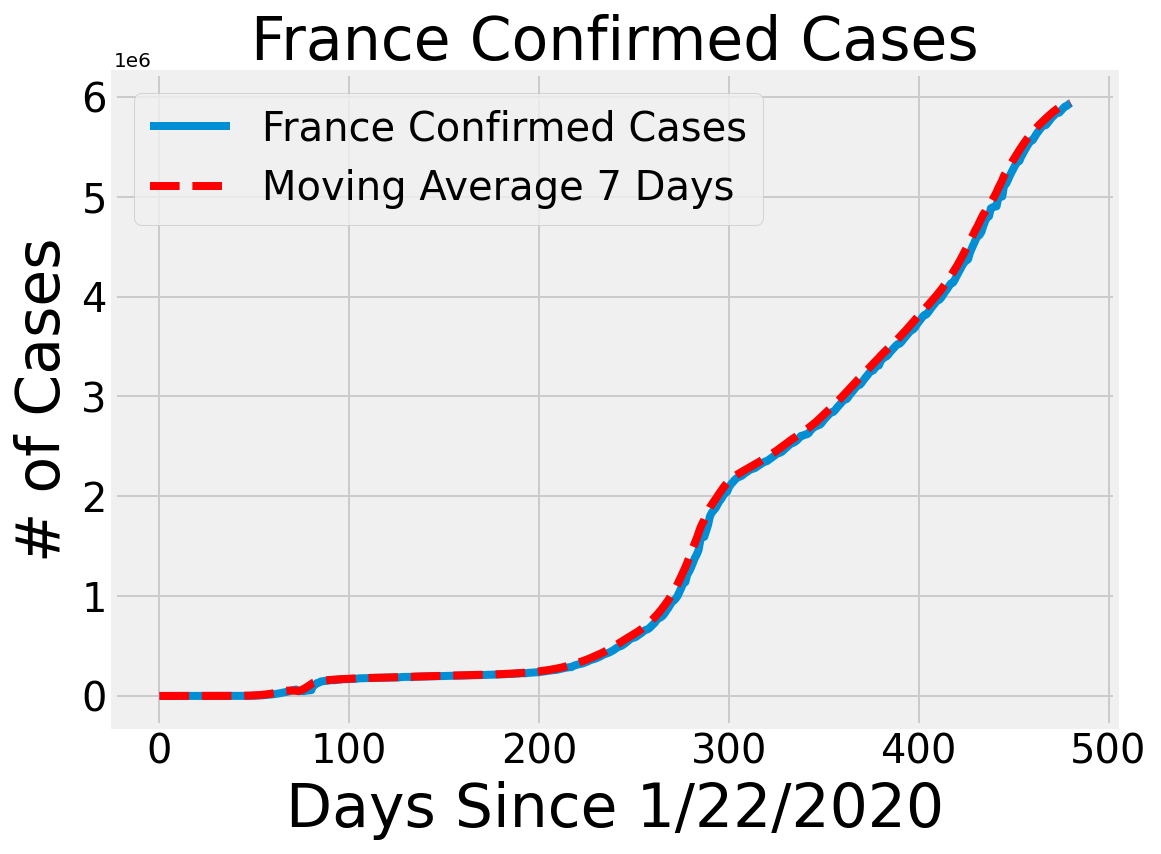

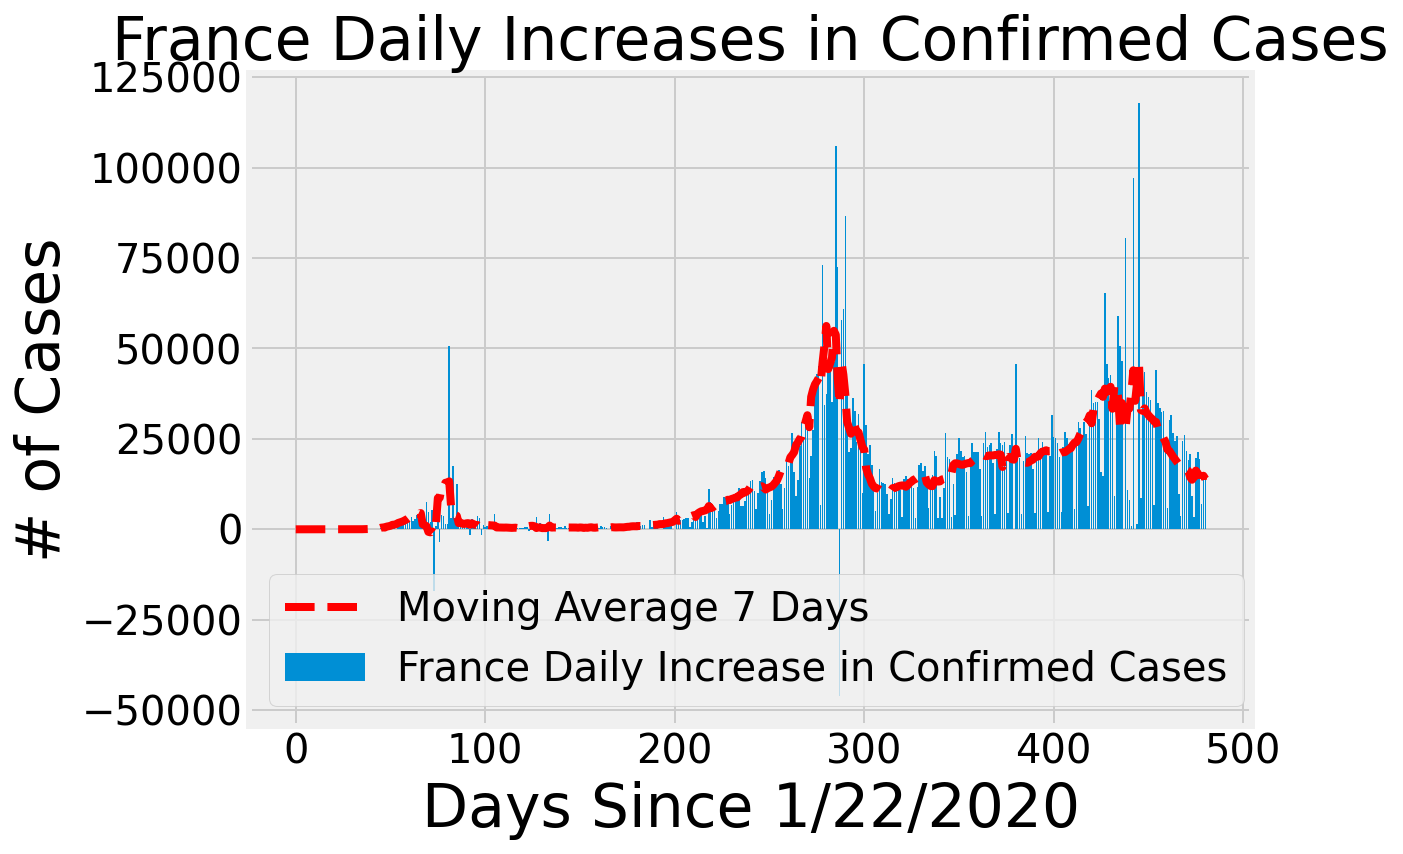

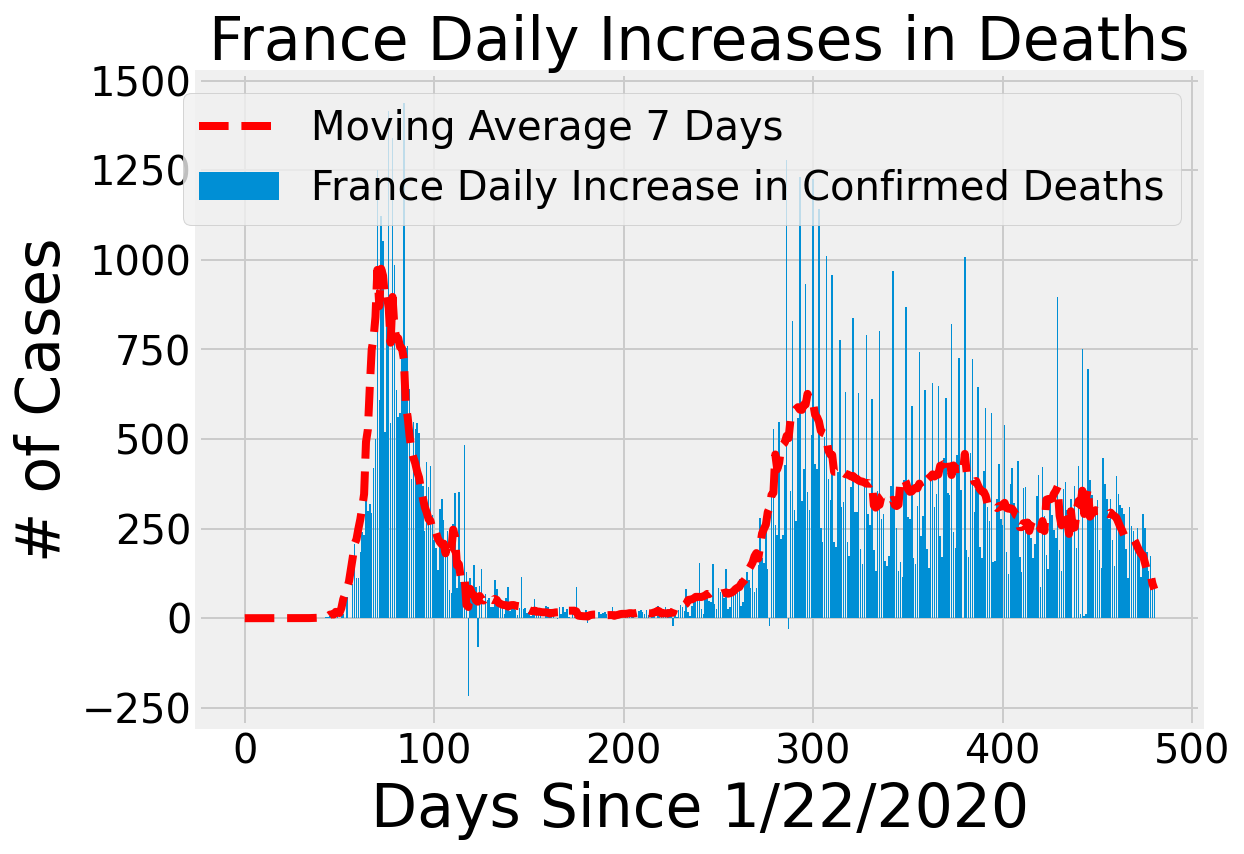

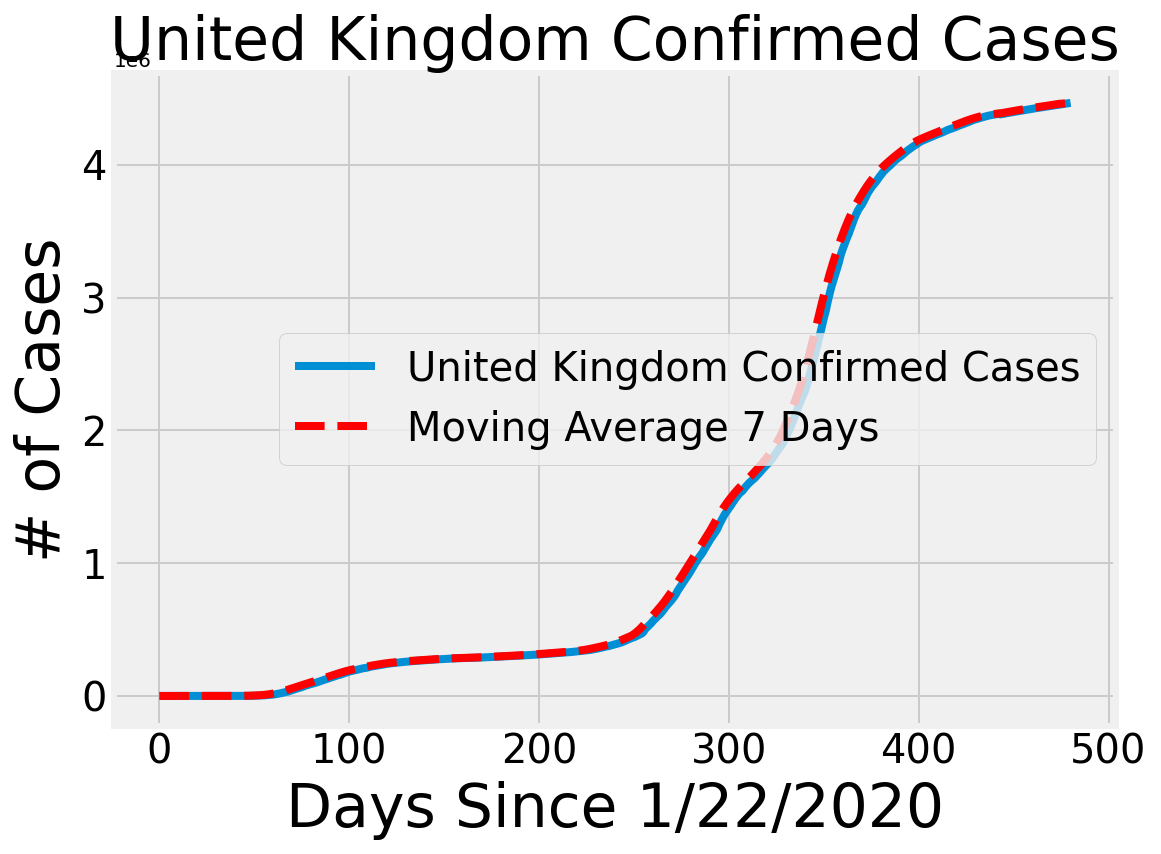

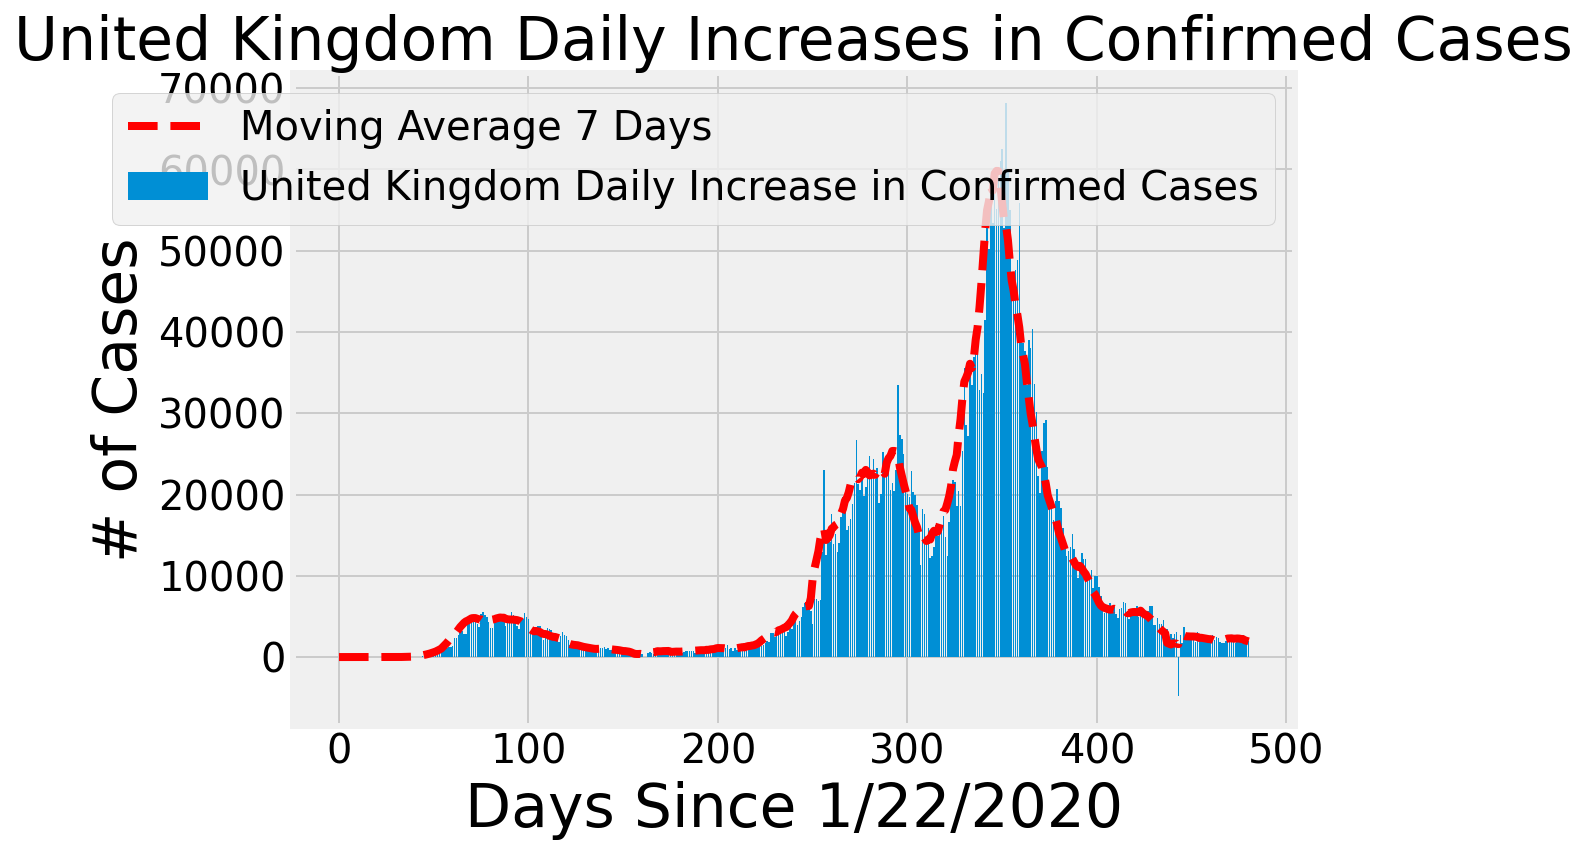

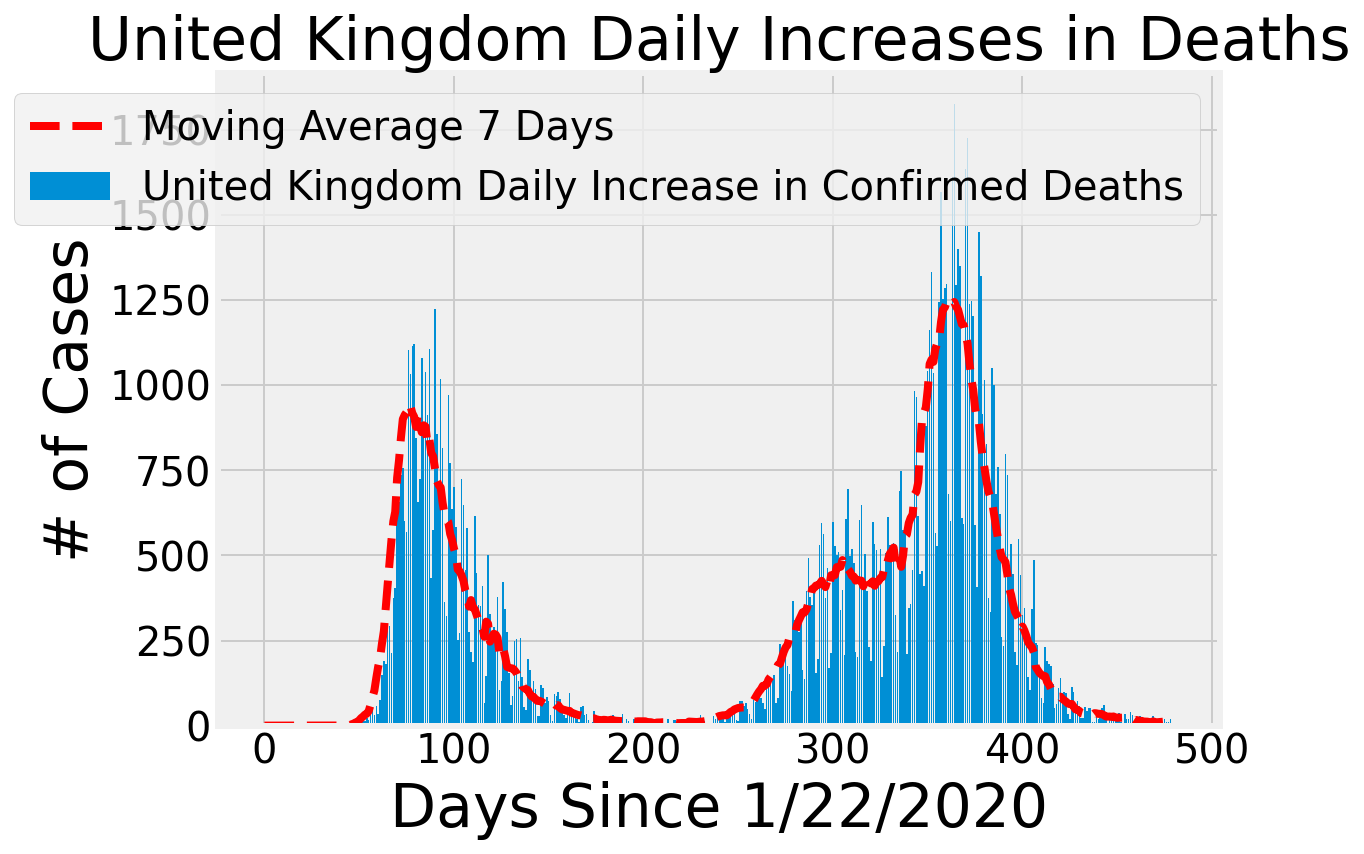

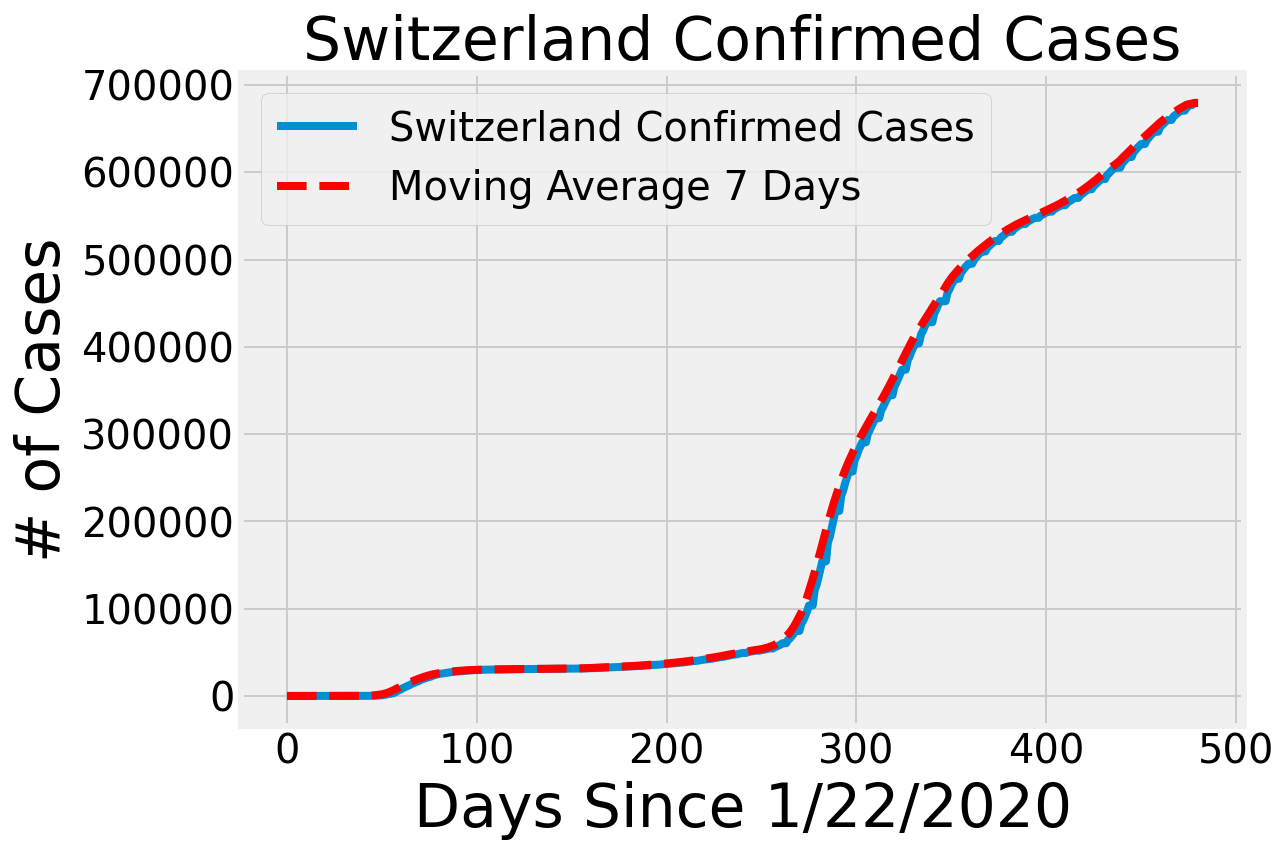

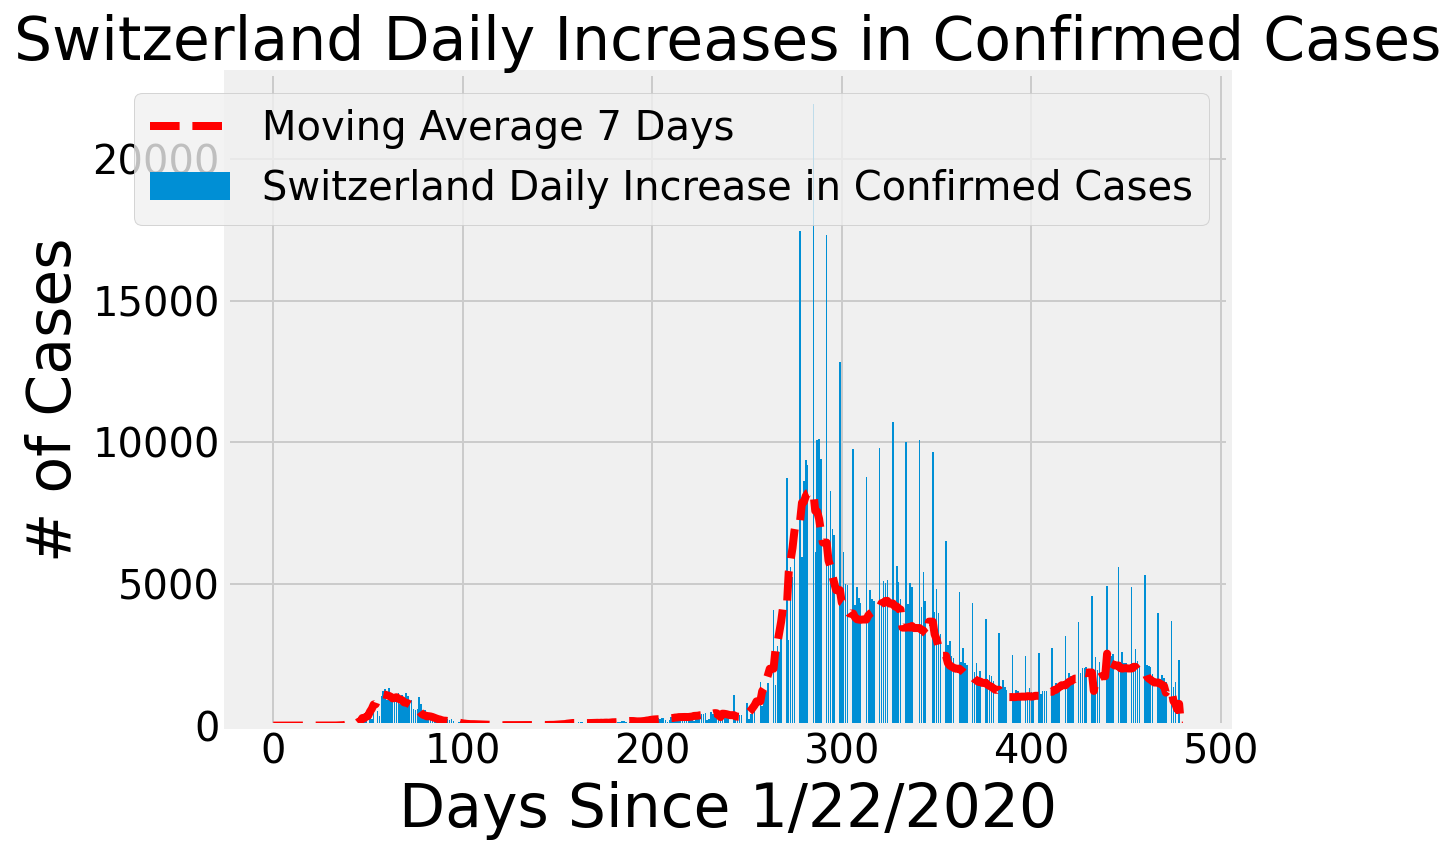

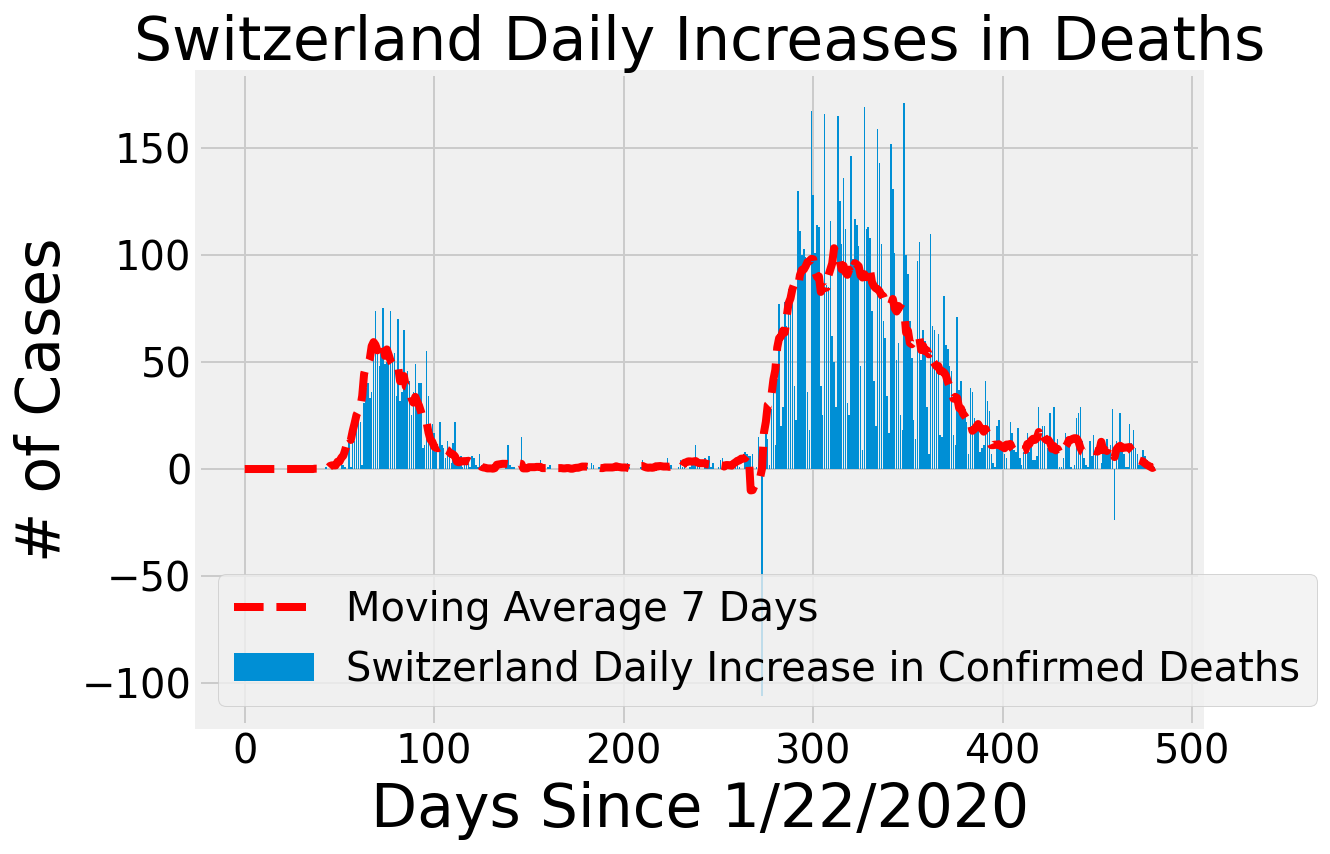

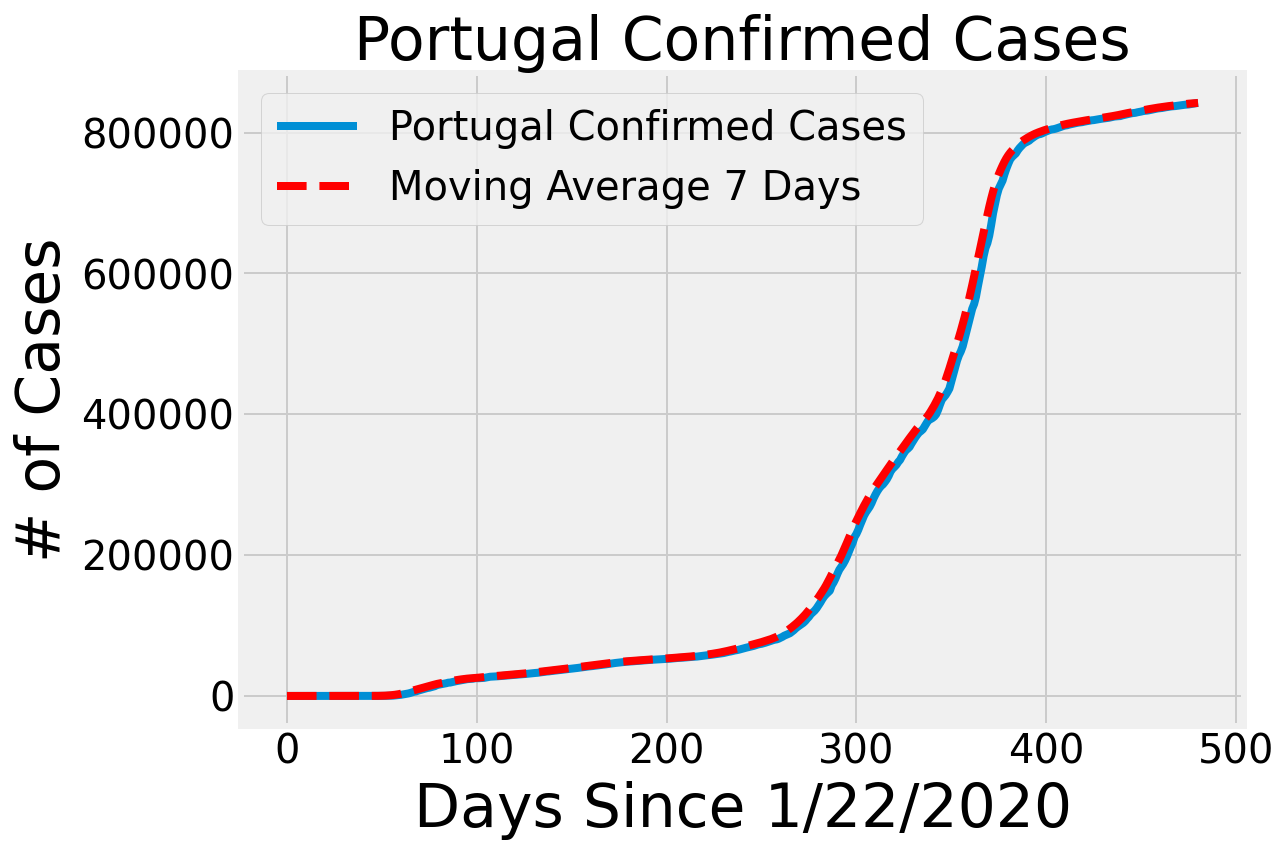

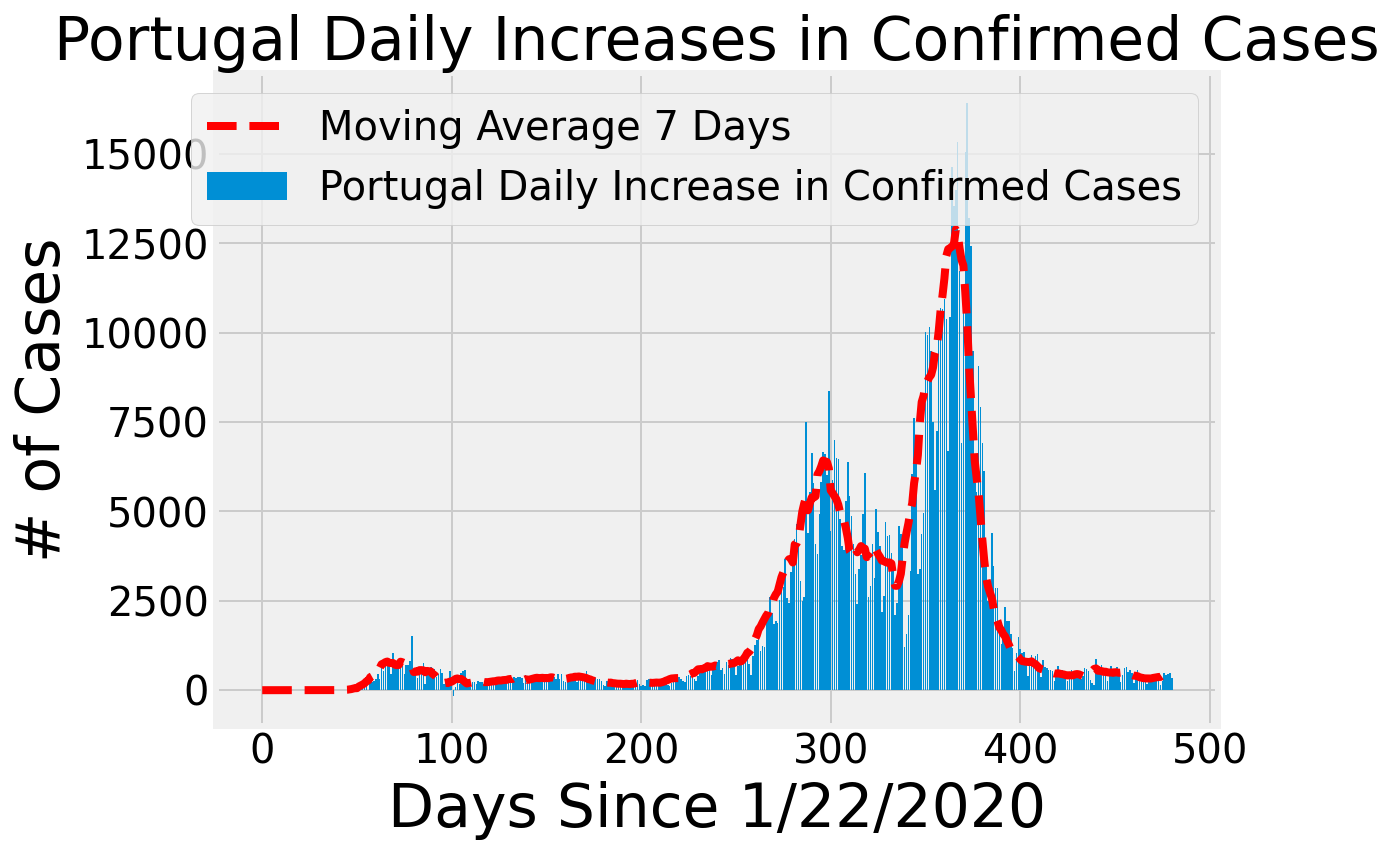

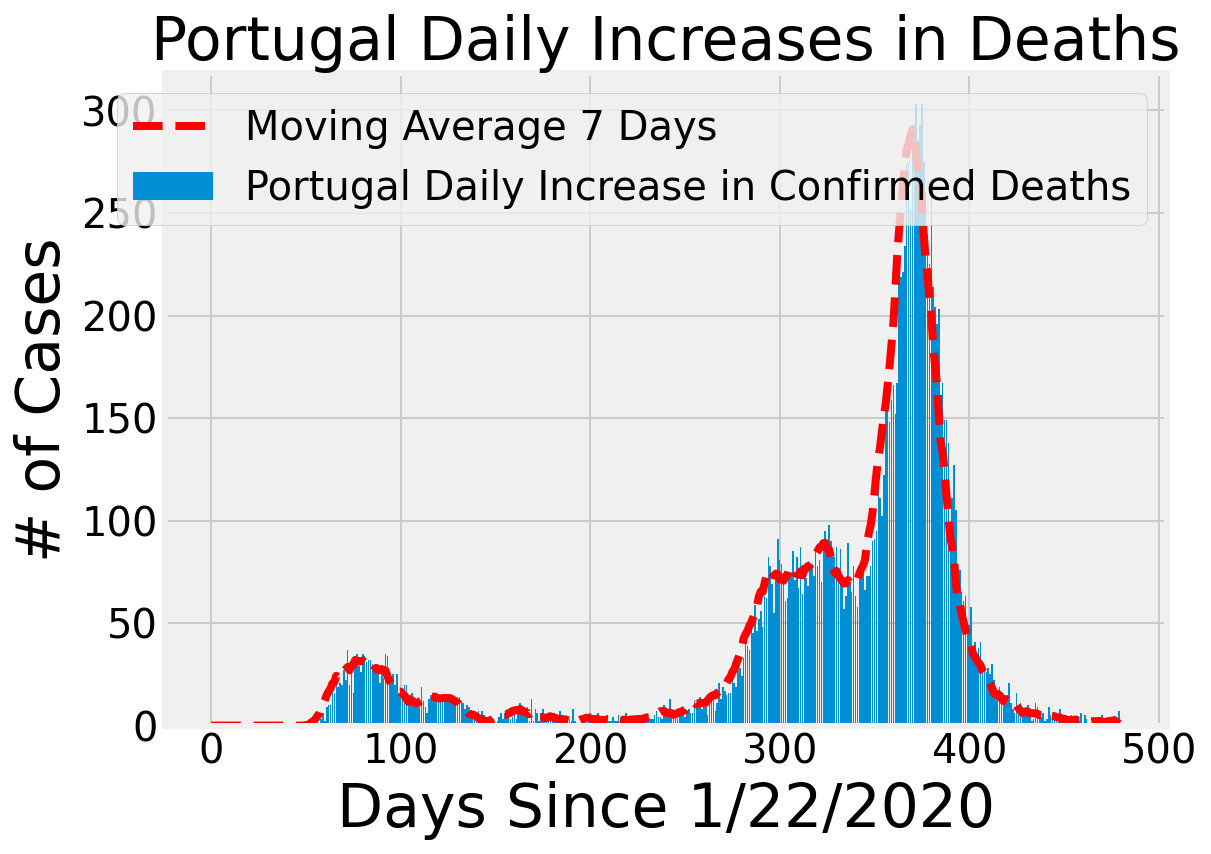

In [68]:
countries = ['US', 'Russia', 'India', 'China', 'Italy',
             'Spain', 'France', 'United Kingdom', 
             'Switzerland','Portugal'] 

for country in countries:
    country_visualizations(country)

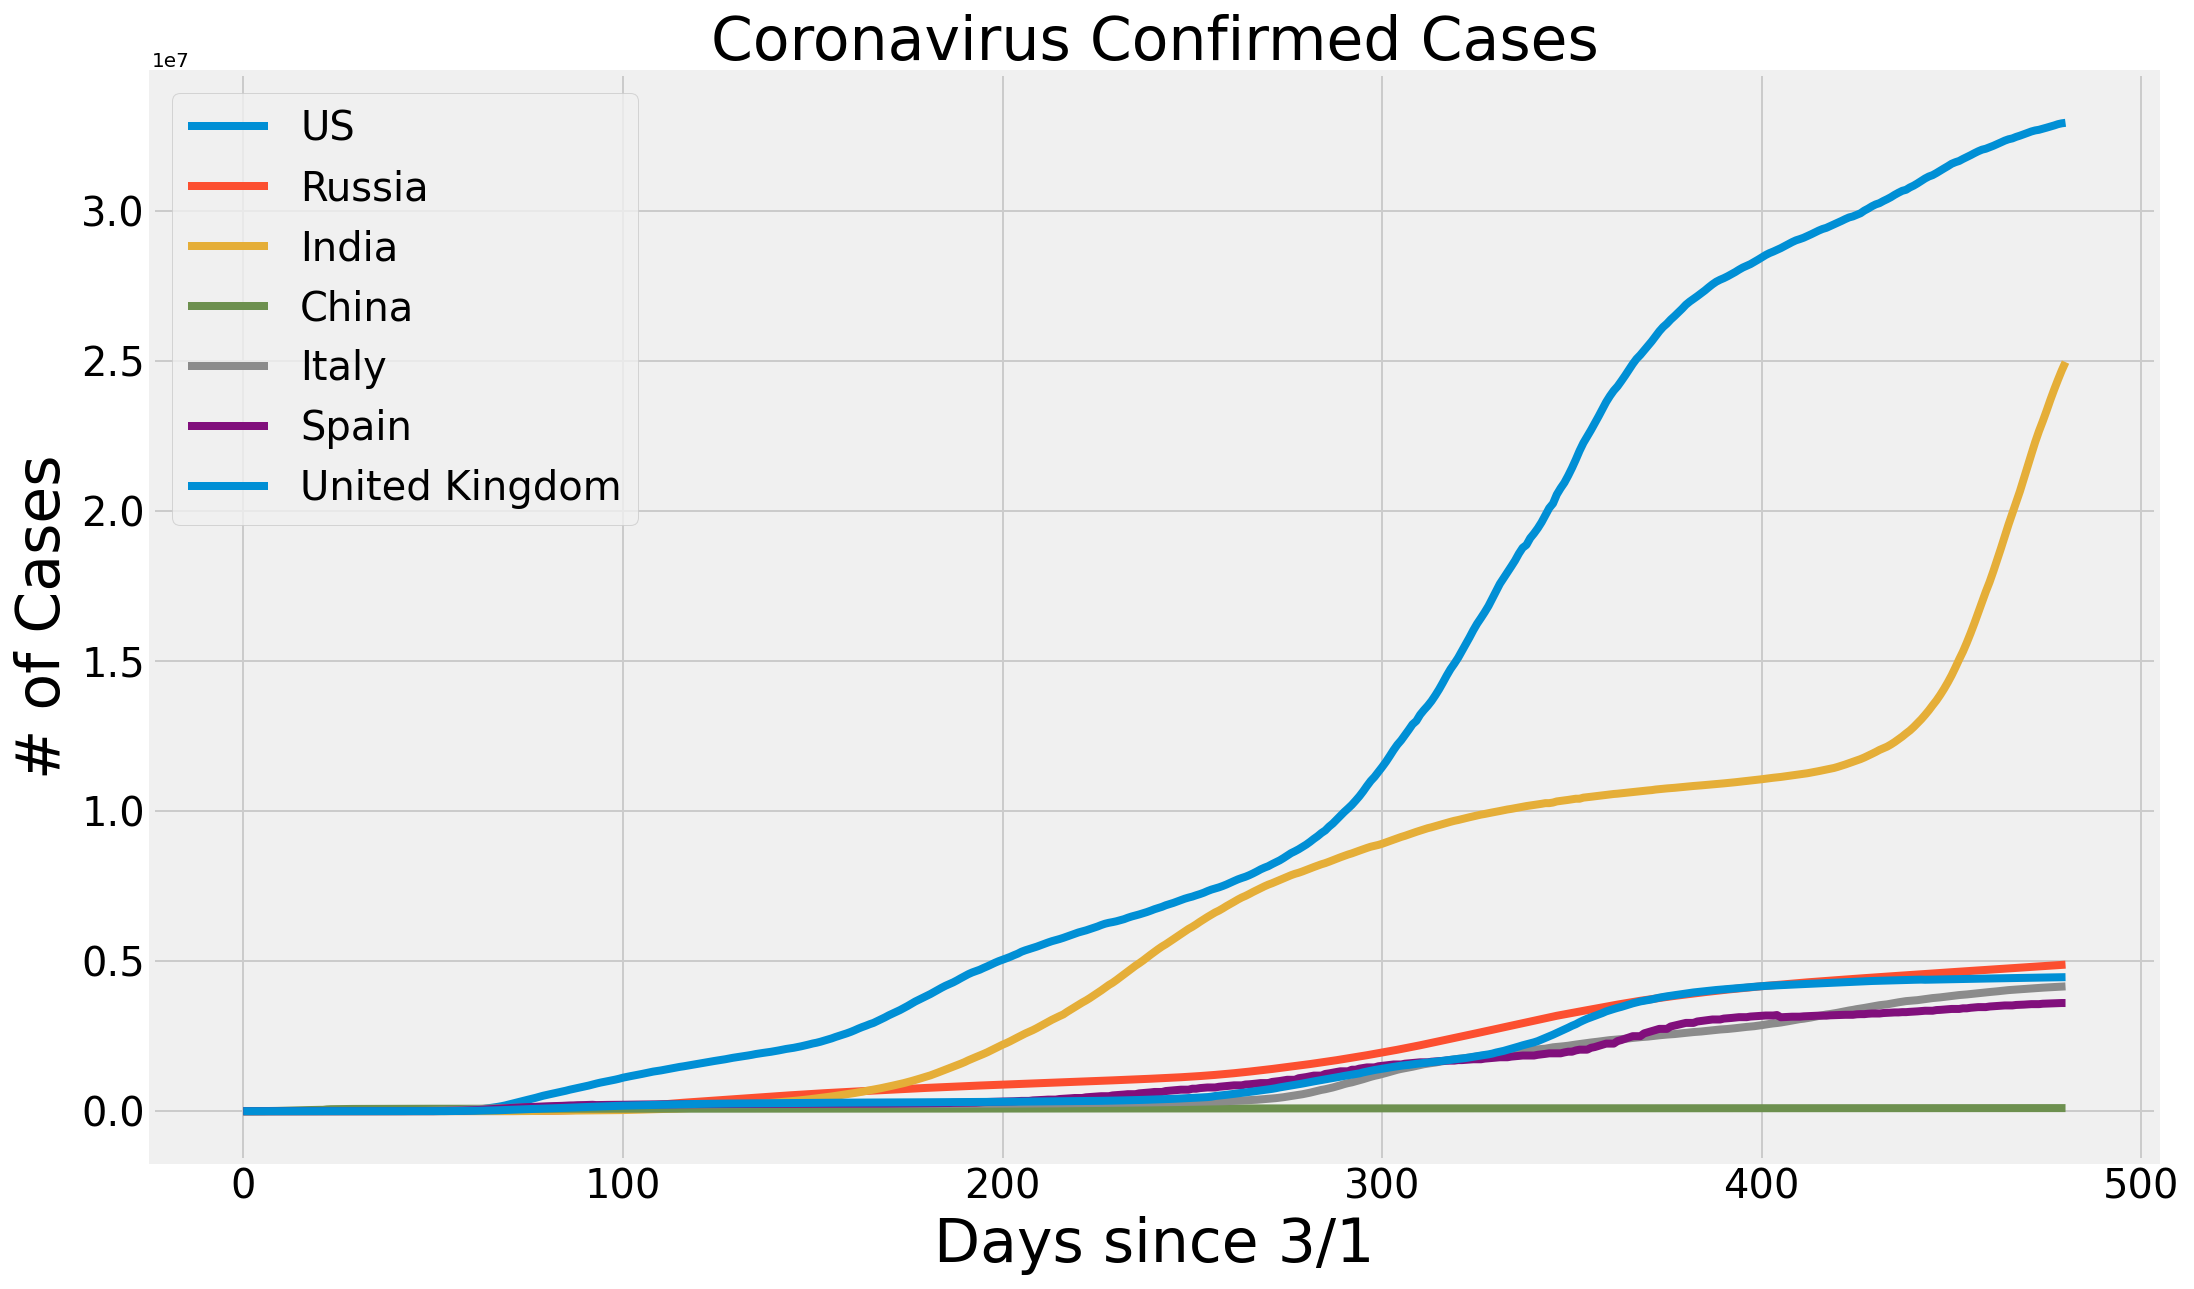

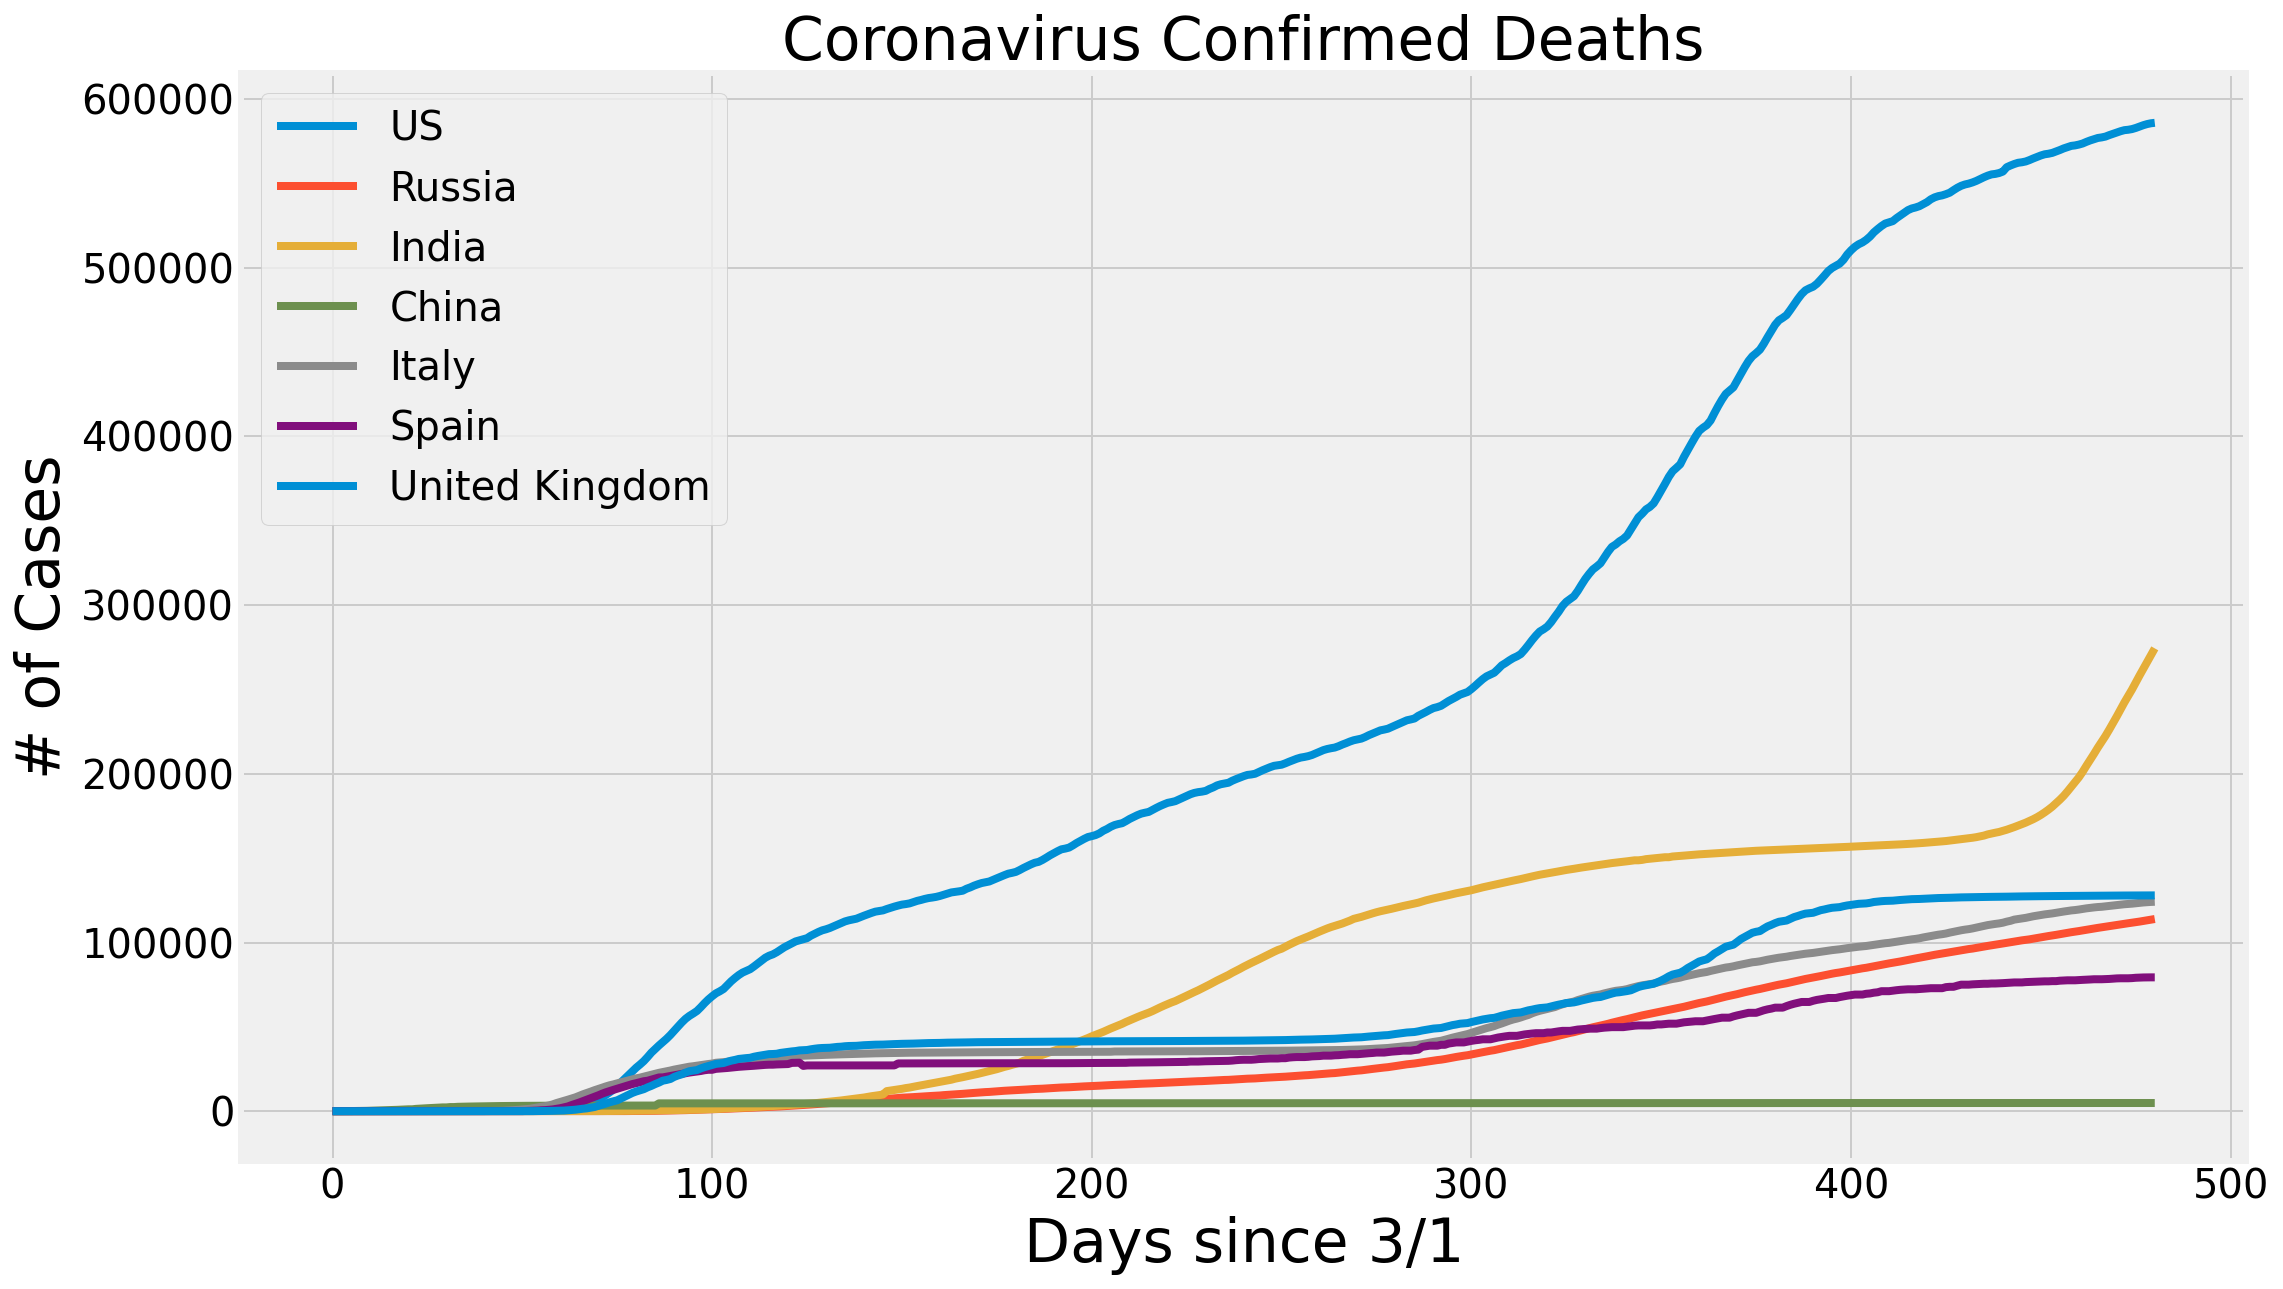

In [69]:
# Country Comparison
# removed redundant code

compare_countries = ['US', 'Russia', 'India', 'China', 'Italy','Spain', 'United Kingdom'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths']

for num in range(2):
    plt.figure(figsize=(16, 10))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 3/1', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [70]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

### Predictions for confirmed coronavirus cases worldwide 

These three models predict future covid cases on a global level.

The prediction models include

Support Vector Machine
Polynomial Regression
Bayesian Ridge Regression

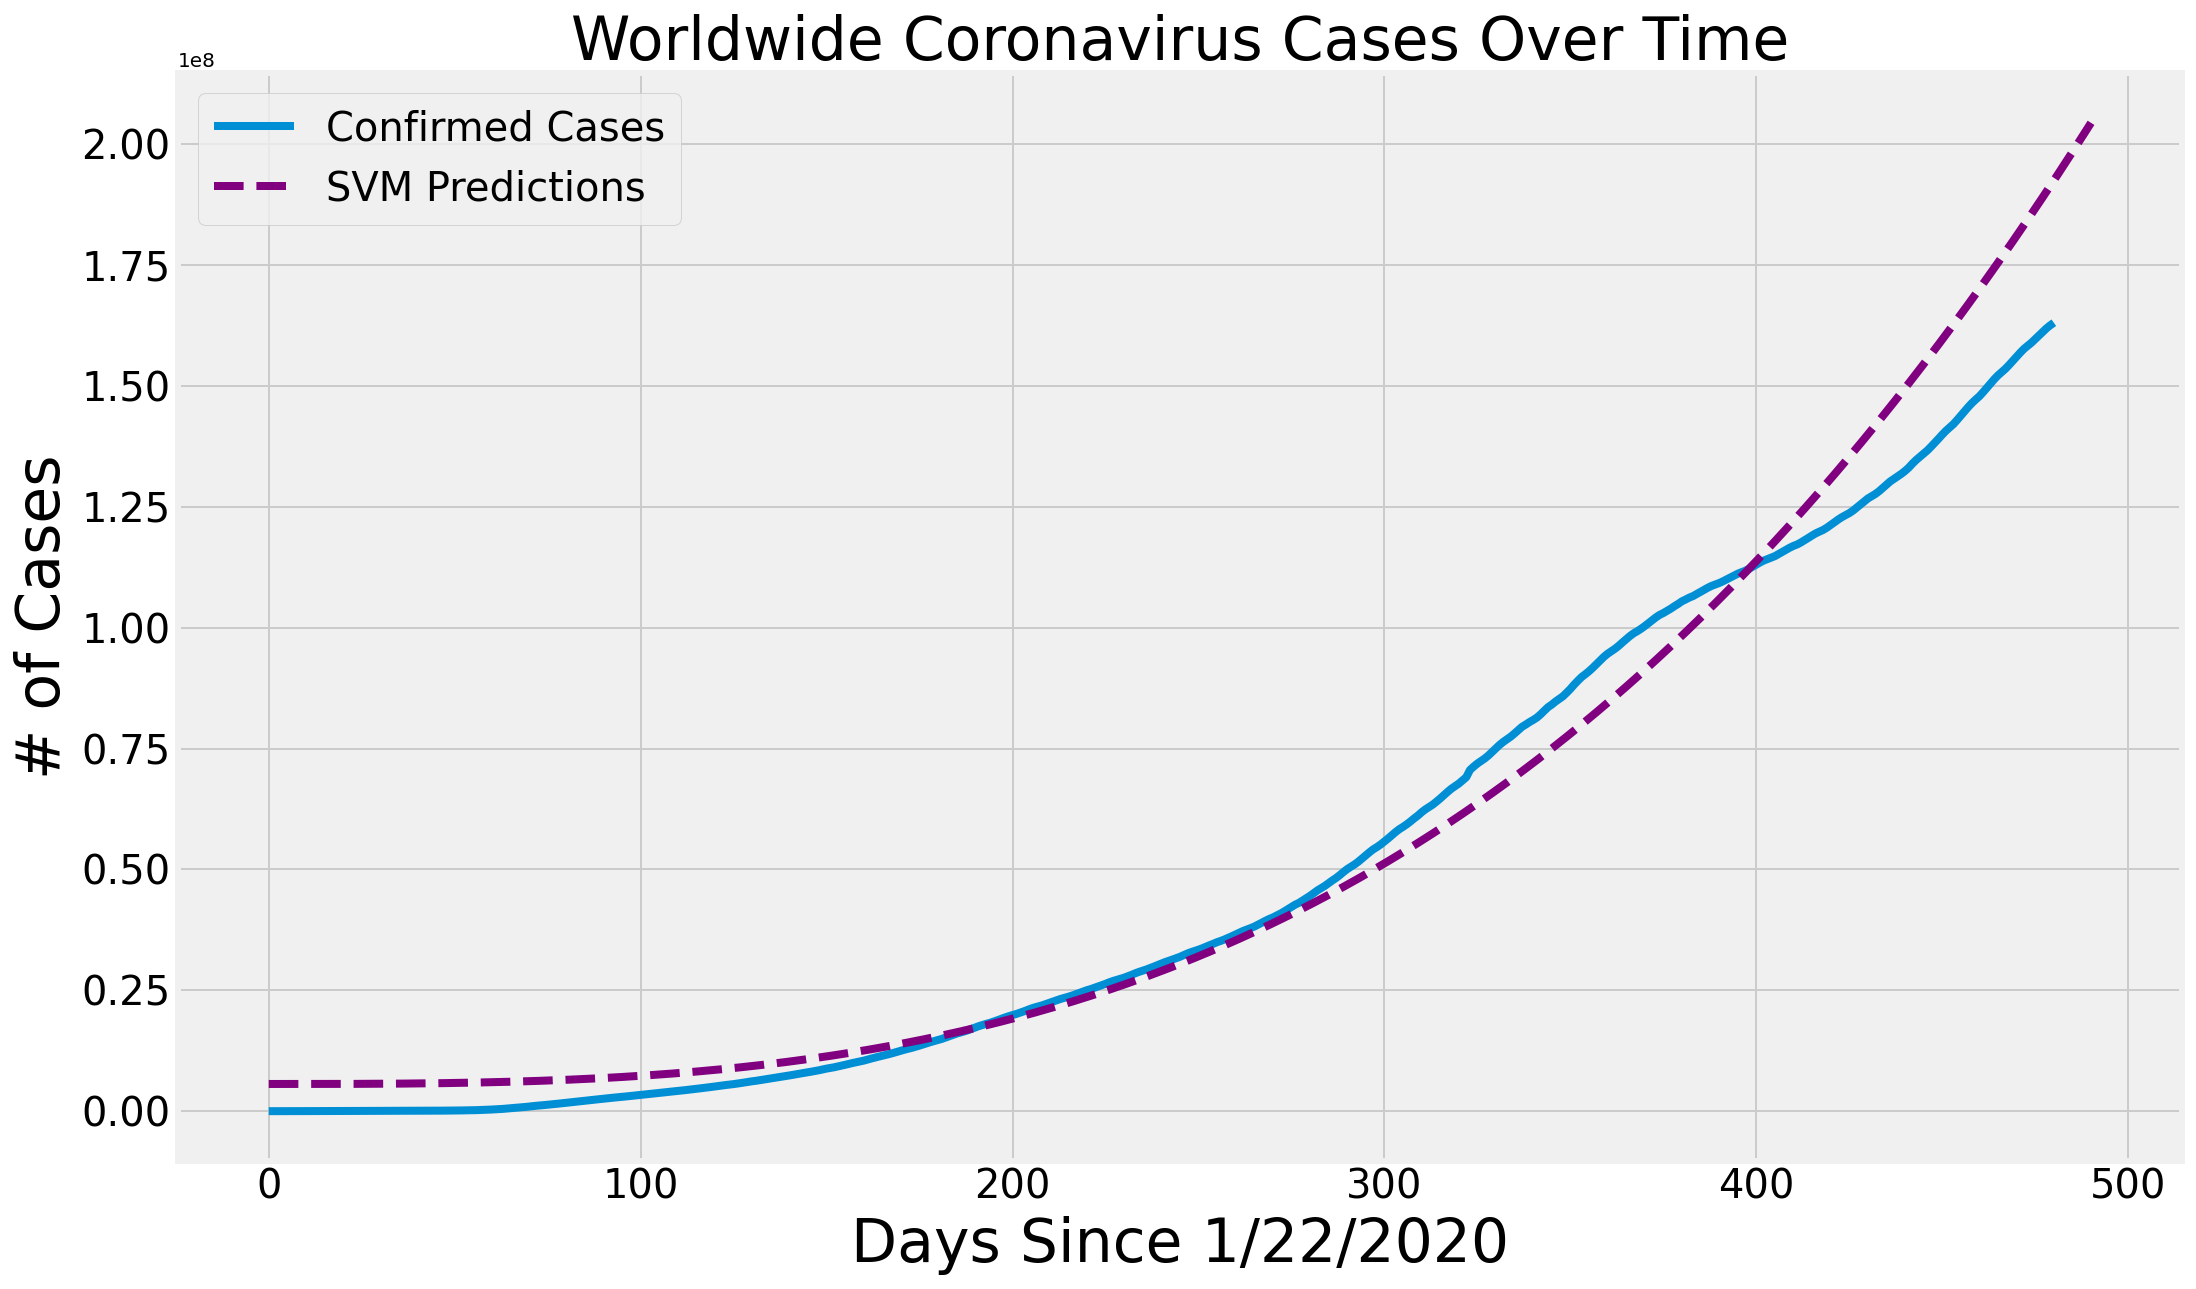

In [71]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

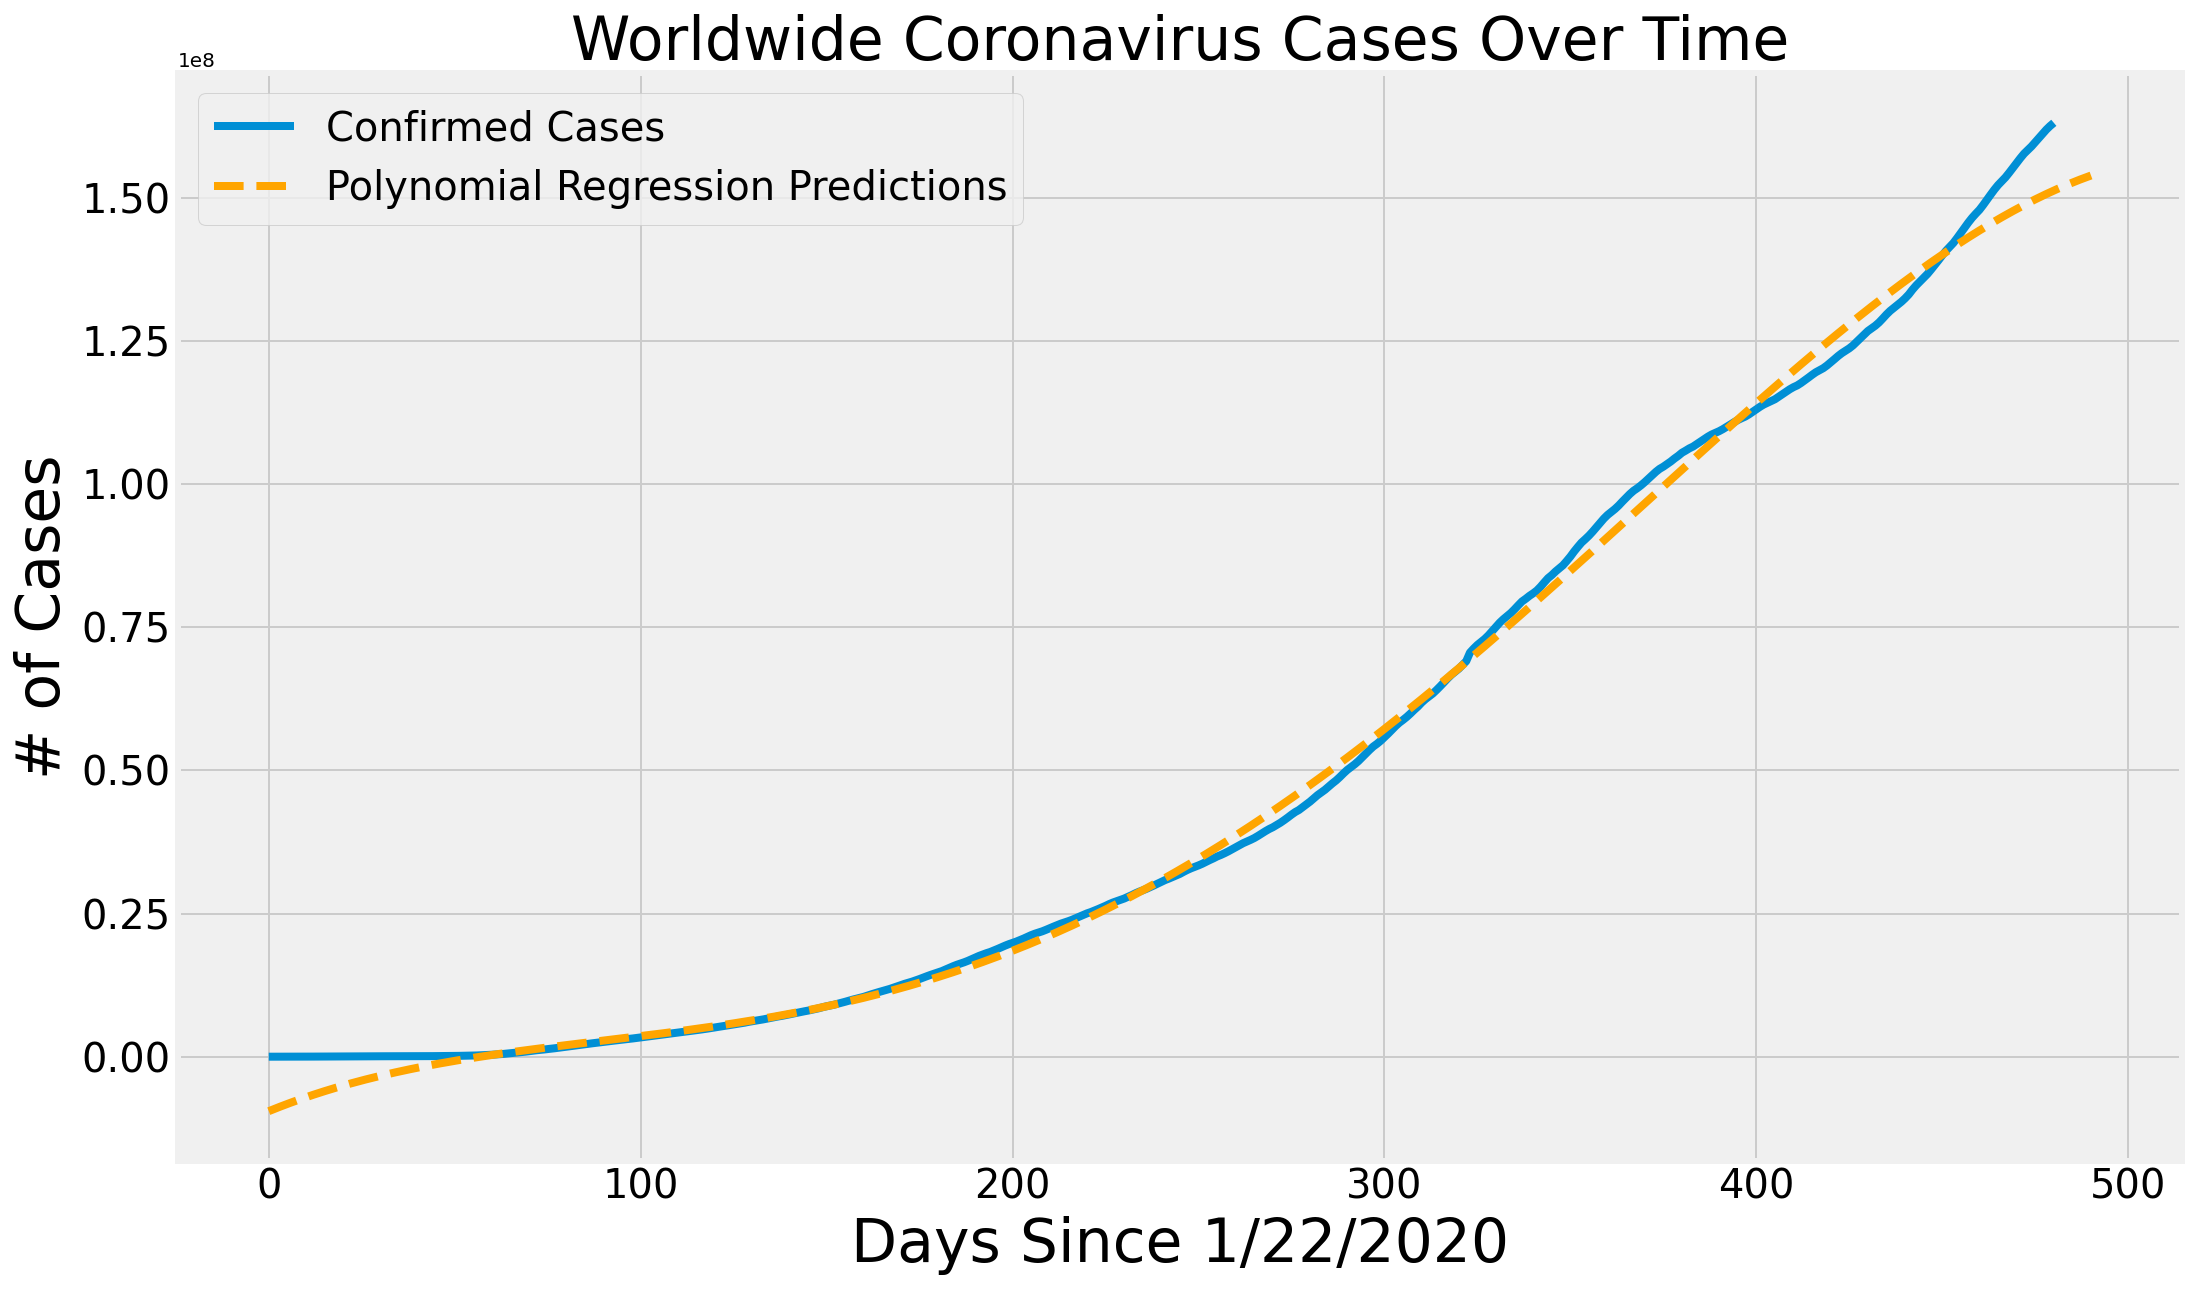

In [72]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

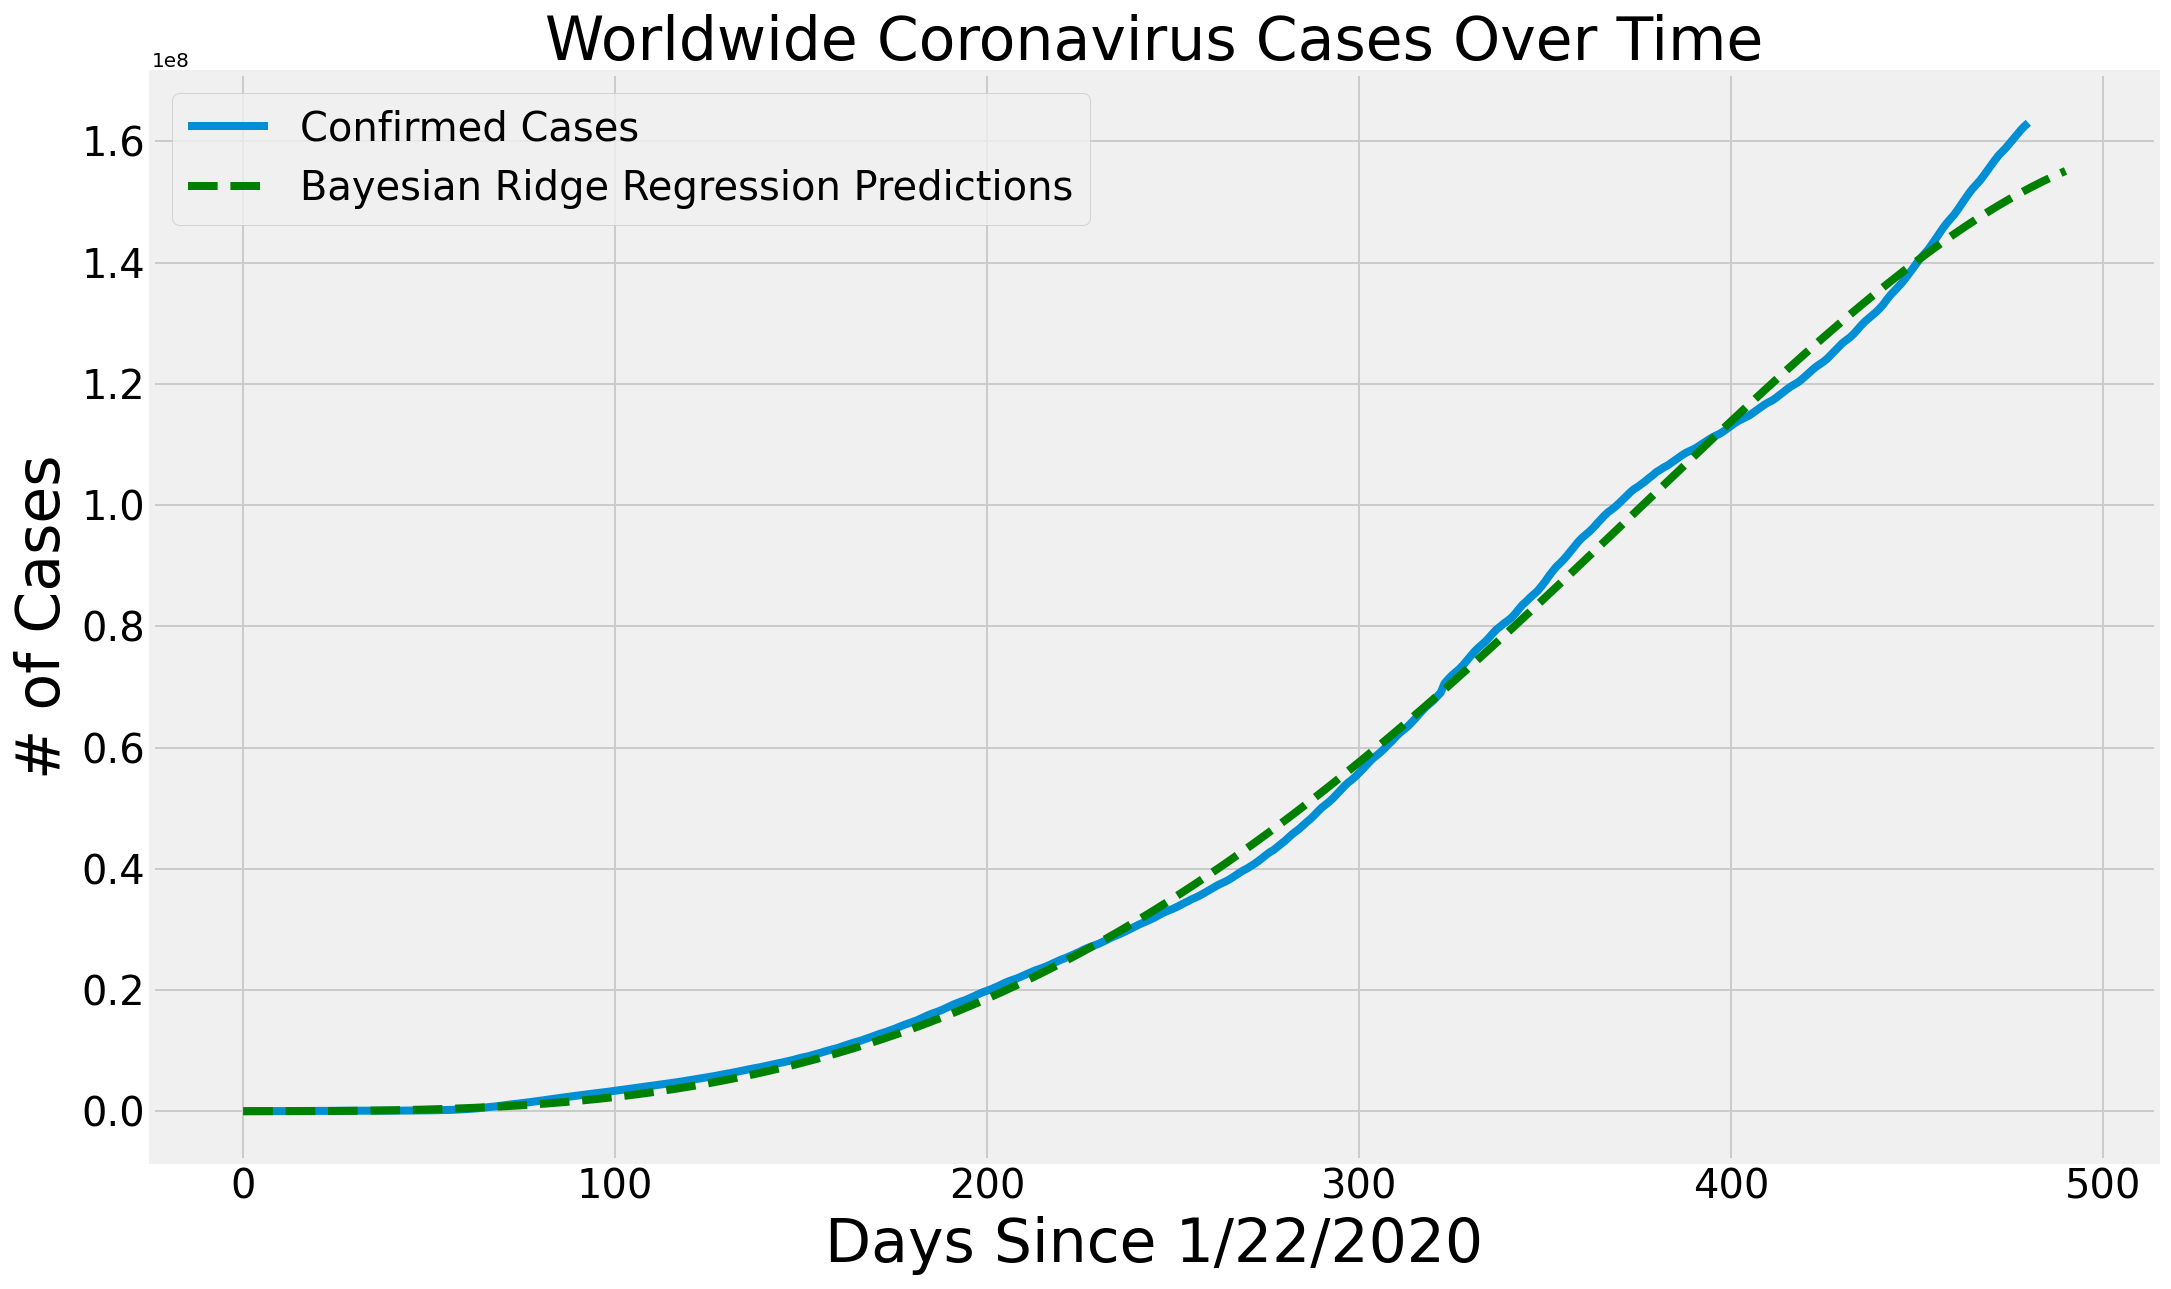

In [73]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [74]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

In [75]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

In [76]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

In [106]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [107]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []

country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []

#taking the sum of confirmed cases in contries. if country has no cases it is removed from confimed column.
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
#     country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    
    country_active_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

## Data table 

This shows covid data for several countries. The table includes the number of confirmed cases, deaths, active cases, incidence rate, and mortality rate.

In [79]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': [format(int(i), ',d') for i in country_confirmed_cases],
                          'Number of Deaths': [format(int(i), ',d') for i in country_death_cases], 
                          'Number of Active Cases' : [format(int(i), ',d') for i in country_active_cases], 'Incidence Rate' : country_incidence_rate,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Oranges')

In [80]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [81]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
# province_recovery_cases = []
province_active = [] 
province_incidence_rate = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())

   
    
    province_active.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Active'].sum())
    province_incidence_rate.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Incident_Rate'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [82]:
# # number of cases per province/state/city top 100 
# province_limit = 100 
# province_df = pd.DataFrame({'Province/State Name': unique_provinces[:province_limit], 'Country': province_country[:province_limit], 'Number of Confirmed Cases': [format(int(i), ',d') for i in province_confirmed_cases[:province_limit]],
#                           'Number of Deaths': [format(int(i), ',d') for i in province_death_cases[:province_limit]],'Number of Active Cases' : [format(int(i), ',d') for i in province_active[:province_limit]], 
#                             'Incidence Rate' : province_incidence_rate[:province_limit], 'Mortality Rate': province_mortality_rate[:province_limit]})
# # number of cases per country/region

# province_df.style.background_gradient(cmap='Oranges')

In [83]:
# return the data table with province/state info for a given country
def country_table(country_name):
    states = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    
    state_active = [] 
    state_incidence_rate = [] 
    state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())

        state_active.append(latest_data[latest_data['Province_State']==states[i]]['Active'].sum())
        state_incidence_rate.append(latest_data[latest_data['Province_State']==states[i]]['Incident_Rate'].sum())
        state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
        
      
    state_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                              'Number of Deaths': [format(int(i), ',d') for i in state_death_cases], 'Number of Active Cases' : [format(int(i), ',d') for i in state_active], 
                             'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
    # number of cases per country/region
    return state_df

### Datatable for india 

In [84]:
india_table = country_table('India')
india_table.style.background_gradient(cmap='Oranges')

In [85]:
#END